In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Previous cell doesn't add this, so done manually
sys.path.append('C:\\Users\\bde2002.53381\\Desktop\\master-thesis')

In [3]:
import pandas as pd
import numpy as np
from dython import nominal
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from synthesis.evaluation import visual, metrics
from quality_evaluation.statistical_metrics import *
from numpy import linalg as LA
import math

# Load the datasets (for subset 2)

In [4]:
# Load the original and validation dataframes
df_ori = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\df_ori_2_binned.csv") # This is the original data WITHOUT the holdout validation set
df_ori_val = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\df_val_2_binned.csv")

In [4]:
epsilon_names = ['10','1','0_1','0_01','0_001']
ms_privacy_levels = []
pb_privacy_levels = []

g = globals()

# The following cells lead to a list (e.g. syn_10) with all the versions of that privacy level, 
# and then to a list privacy_levels that contains all these sublists of the different privay levels with their versions

In [5]:
# Load ms dataframes for dataset 2
for epsilon in epsilon_names:
    syn_name = 'ms_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\ms_df_syn_2_e{}_v{}.csv".format(epsilon, versie))
        g[syn_name].append(df)
    ms_privacy_levels.append(g[syn_name])

In [6]:
# Load pb dataframes for dataset 2
for epsilon in epsilon_names:
    syn_name = 'pb_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\pb_df_syn_2_e{}_v{}.csv".format(epsilon, versie))
        g[syn_name].append(df)
    pb_privacy_levels.append(g[syn_name])

In [7]:
## Here the syntehtic and ori datasets are prepared in the following manner:
# - target variable is added
# - variables are added (age) and removed (dates, vital status)
# - missing values are still present

In [8]:
# Put target variable at end for clearer visualization
def target_last_column(df, target):
    df = df[[col for col in df.columns if col != target] + [target]]
    return df

In [9]:
target = '5_yos'
df_ori = target_last_column(df_ori, target)
df_ori_val = target_last_column(df_ori_val, target)

for df_syns in ms_privacy_levels:
    for idx, df_syn in enumerate(df_syns):
        df_syns[idx] = target_last_column(df_syns[idx], target)

for df_syns in pb_privacy_levels:
    for idx, df_syn in enumerate(df_syns):
        df_syns[idx] = target_last_column(df_syns[idx], target)

NameError: name 'df_ori' is not defined

In [11]:
df_names = ['original data', 'very low', 'low', 'medium', 'high', 'very high']
labels = ['very low', 'low', 'medium', 'high', 'very high']
version = [1,2,3,4,5]

In [12]:
# Balance in datasets
for privacy_levels in [ms_privacy_levels, pb_privacy_levels]:
    i=1
    print("new algorithm")
    for df_syns in privacy_levels:
        j=0
        print("privacy level:", df_names[i])
        for df_syn in df_syns:
            print("version:", version[j])
            print(df_syn['5_yos'].value_counts()/(105695))
            j+=1
        i+=1

new algorithm
privacy level: very low
version: 1
0    0.577019
1    0.422981
Name: 5_yos, dtype: float64
version: 2
0    0.575514
1    0.424486
Name: 5_yos, dtype: float64
version: 3
0    0.576754
1    0.423246
Name: 5_yos, dtype: float64
version: 4
0    0.577123
1    0.422877
Name: 5_yos, dtype: float64
version: 5
0    0.576555
1    0.423445
Name: 5_yos, dtype: float64
privacy level: low
version: 1
0    0.578712
1    0.421288
Name: 5_yos, dtype: float64
version: 2
0    0.580671
1    0.419329
Name: 5_yos, dtype: float64
version: 3
0    0.579971
1    0.420029
Name: 5_yos, dtype: float64
version: 4
0    0.576404
1    0.423596
Name: 5_yos, dtype: float64
version: 5
0    0.576205
1    0.423795
Name: 5_yos, dtype: float64
privacy level: medium
version: 1
0    0.577104
1    0.422896
Name: 5_yos, dtype: float64
version: 2
0    0.575893
1    0.424107
Name: 5_yos, dtype: float64
version: 3
0    0.571673
1    0.428327
Name: 5_yos, dtype: float64
version: 4
0    0.577161
1    0.422839
Name: 5_yos

# Jensen-Shannon Distances per feature and per dataset
Jensen-Shannon divergence (extends KL divergence) to calculate a symmetrical score and distance measure of one probability distribution from another.

new algorithm
privacy level: very low
version: 1


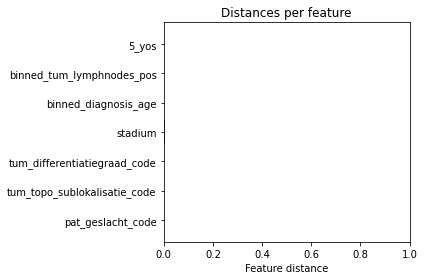

version: 2


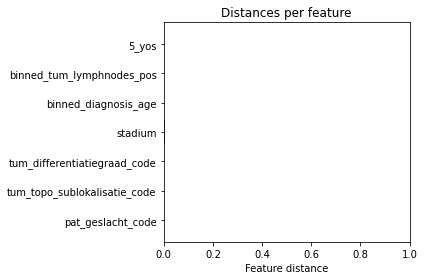

version: 3


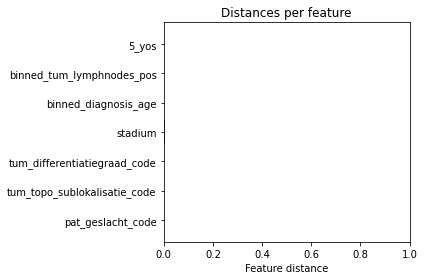

version: 4


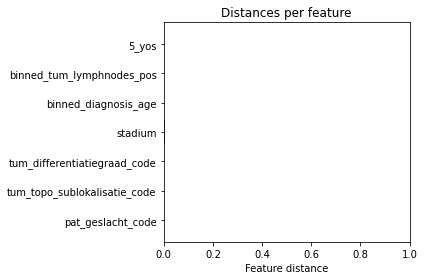

version: 5


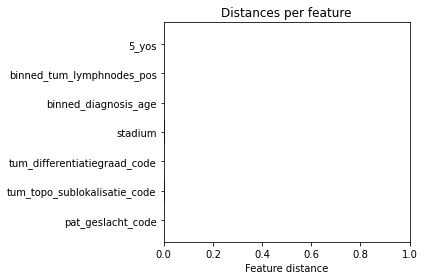

privacy level: low
version: 1


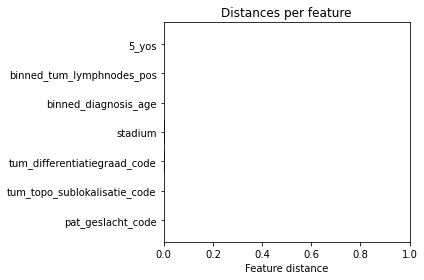

version: 2


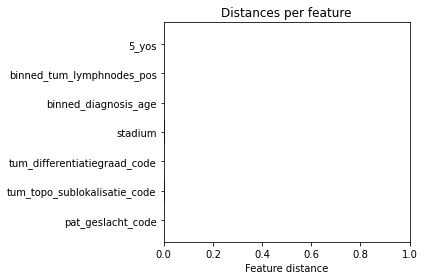

version: 3


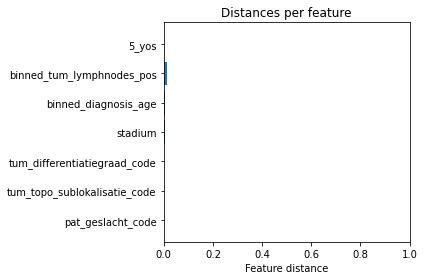

version: 4


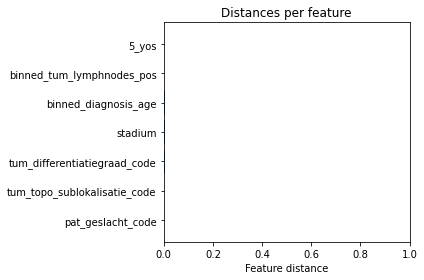

version: 5


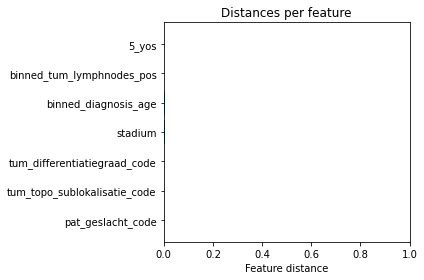

privacy level: medium
version: 1


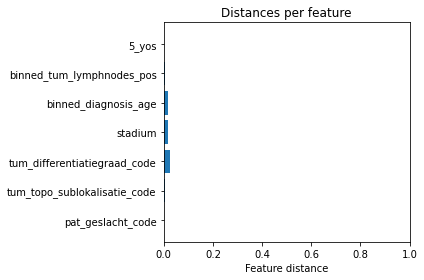

version: 2


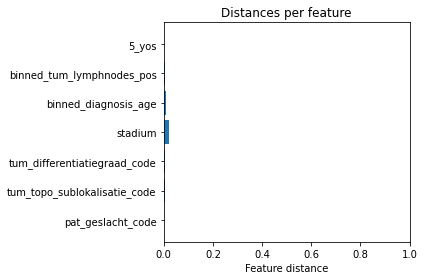

version: 3


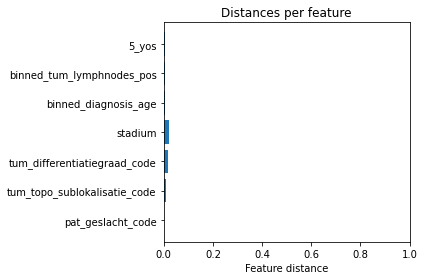

version: 4


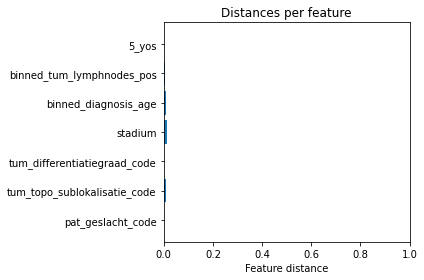

version: 5


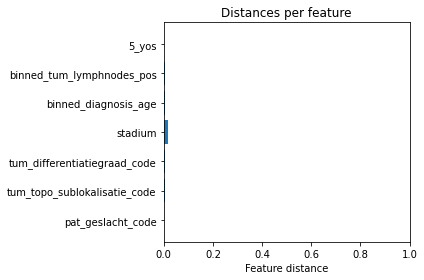

privacy level: high
version: 1


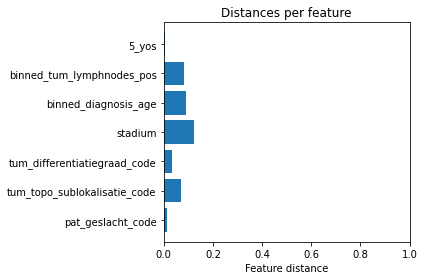

version: 2


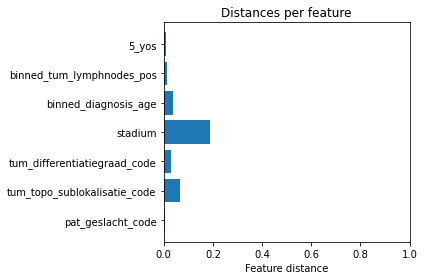

version: 3


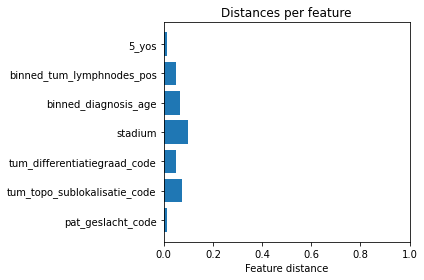

version: 4


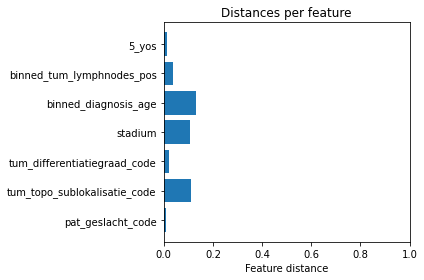

version: 5


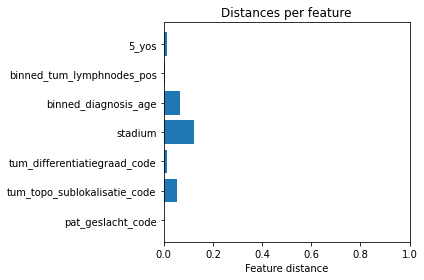

privacy level: very high
version: 1


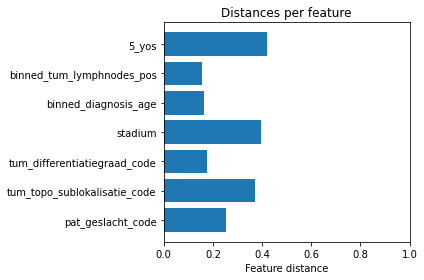

version: 2


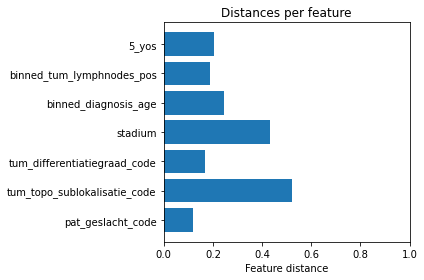

version: 3


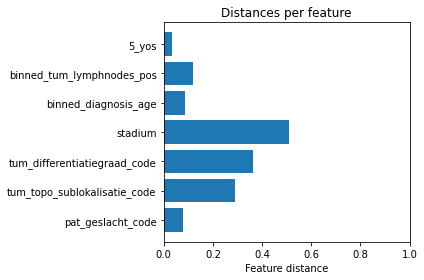

version: 4


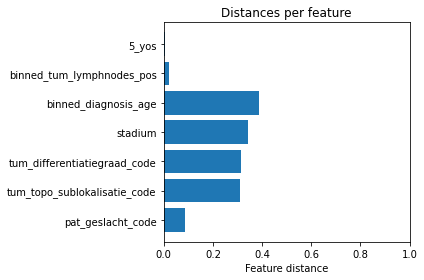

version: 5


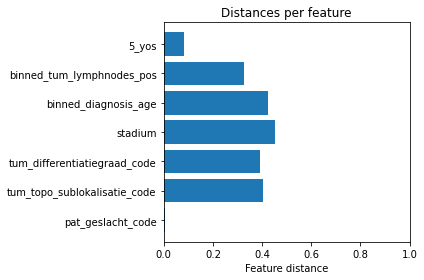

new algorithm
privacy level: very low
version: 1


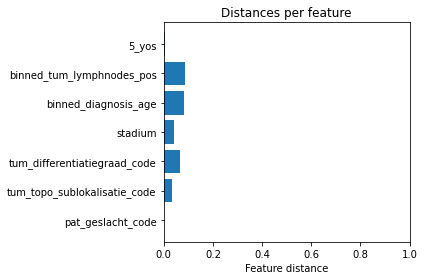

version: 2


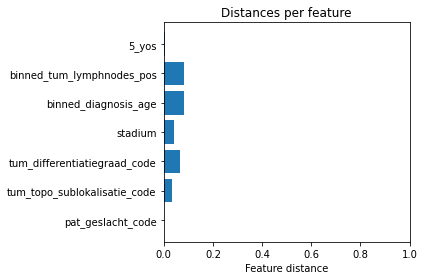

version: 3


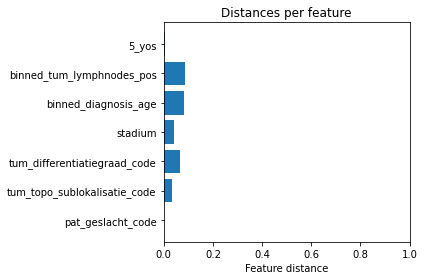

version: 4


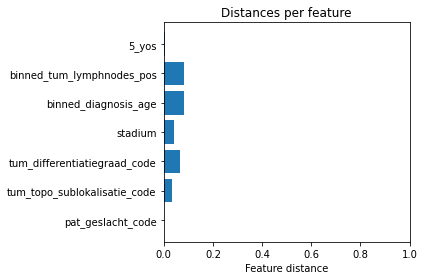

version: 5


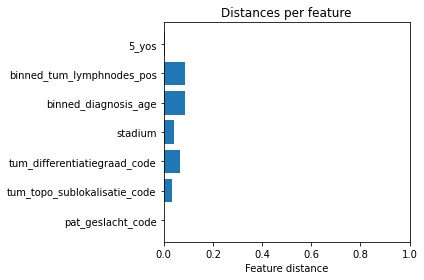

privacy level: low
version: 1


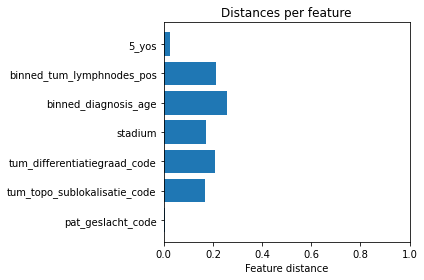

version: 2


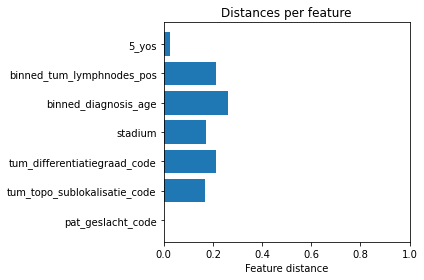

version: 3


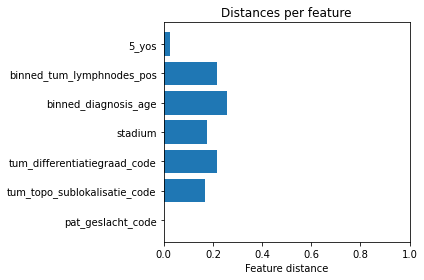

version: 4


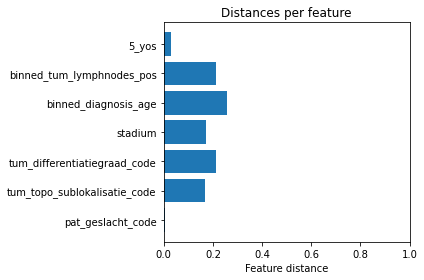

version: 5


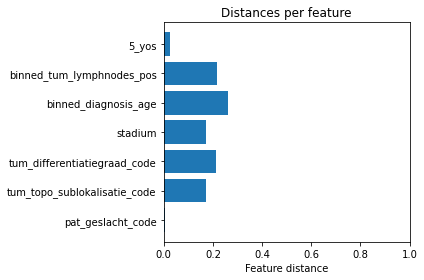

privacy level: medium
version: 1


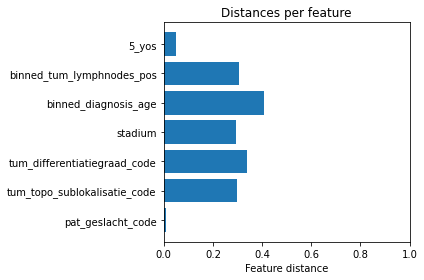

version: 2


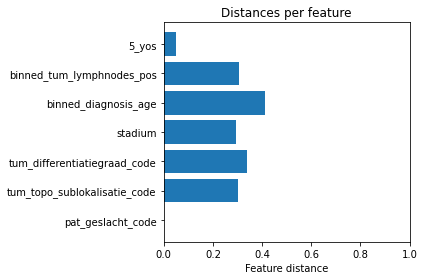

version: 3


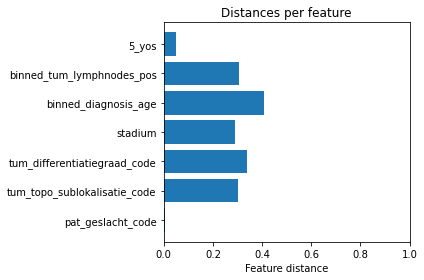

version: 4


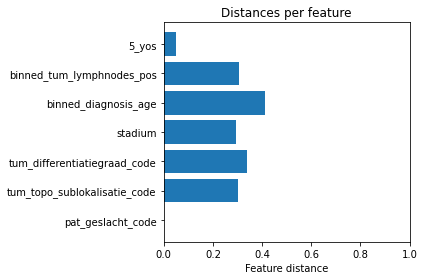

version: 5


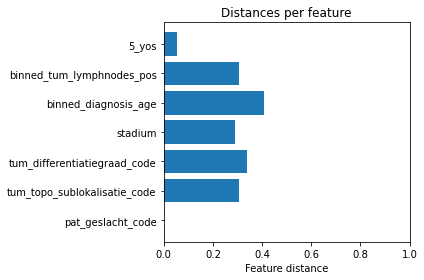

privacy level: high
version: 1


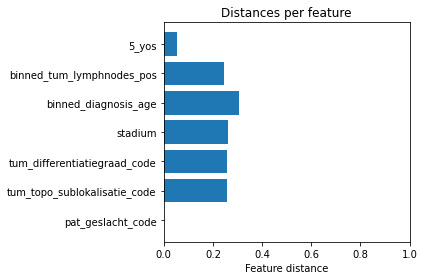

version: 2


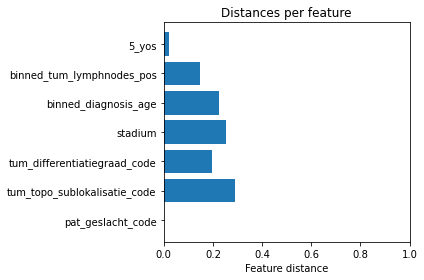

version: 3


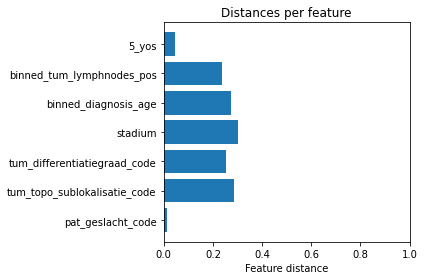

version: 4


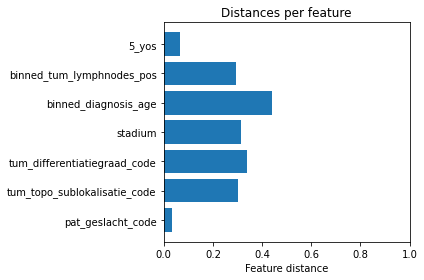

version: 5


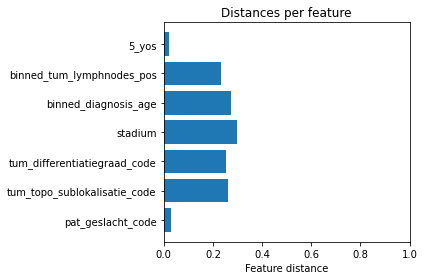

privacy level: very high
version: 1


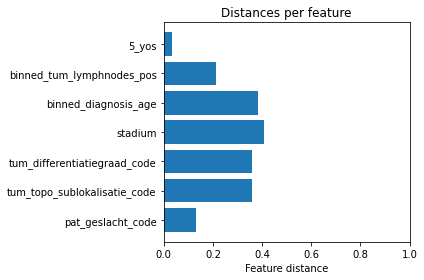

version: 2


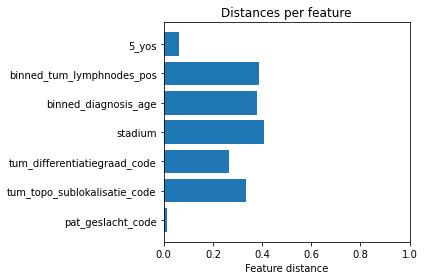

version: 3


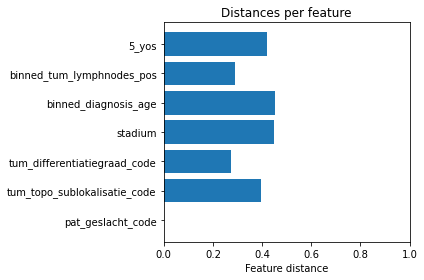

version: 4


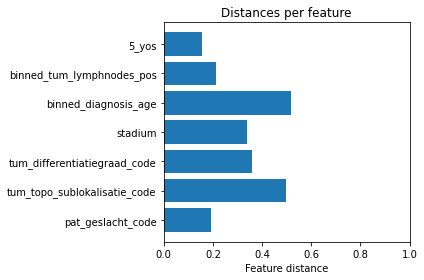

version: 5


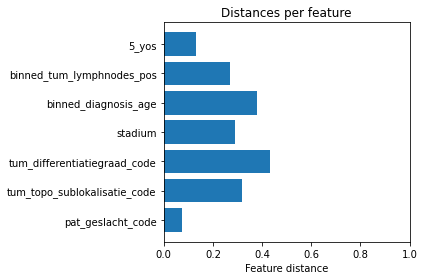

In [11]:
# Print for every version of every privacy level the jensen-shannon distance with the original dataset
for privacy_levels in [ms_privacy_levels, pb_privacy_levels]:
    i=1
    print("new algorithm")
    for df_syns in privacy_levels:
        j=0
        print("privacy level:", df_names[i])
        for df_syn in df_syns:
            print("version:", version[j])
            visual.plot_feature_distances(df_ori, df_syn)
            j+=1
        i+=1

Marginal Synthesizer


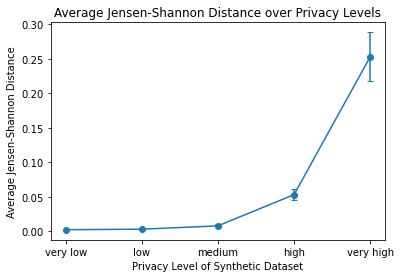

PrivBayes


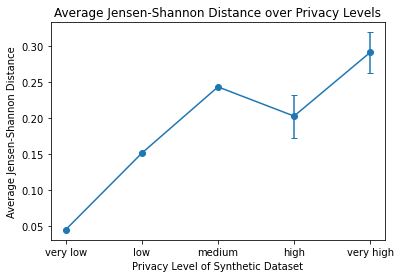

In [12]:
print("Marginal Synthesizer")
plotJSdistance(df_ori, ms_privacy_levels, labels)
print("PrivBayes")
plotJSdistance(df_ori, pb_privacy_levels, labels)

In [12]:
# Store results for combined results at the end
ms_avgJSdistances, ms_stdJSdistances = calculateJSdistance(df_ori, ms_privacy_levels)
pb_avgJSdistances, pb_stdJSdistances = calculateJSdistance(df_ori, pb_privacy_levels)

In [13]:
np.save('ms_mean_js2.npy', ms_avgJSdistances)
np.save('ms_sd_js2.npy', ms_stdJSdistances)

np.save('pb_mean_js2.npy', pb_avgJSdistances)
np.save('pb_sd_js2.npy', pb_stdJSdistances)

## Feature distributions
To visualize the differences in the feature distributions between the datasets

continuous variables are: ['tum_differentiatiegraad_code']
other variables are: ['binned_tum_lymphnodes_pos', '5_yos', 'tum_topo_sublokalisatie_code', 'binned_diagnosis_age', 'pat_geslacht_code', 'stadium']


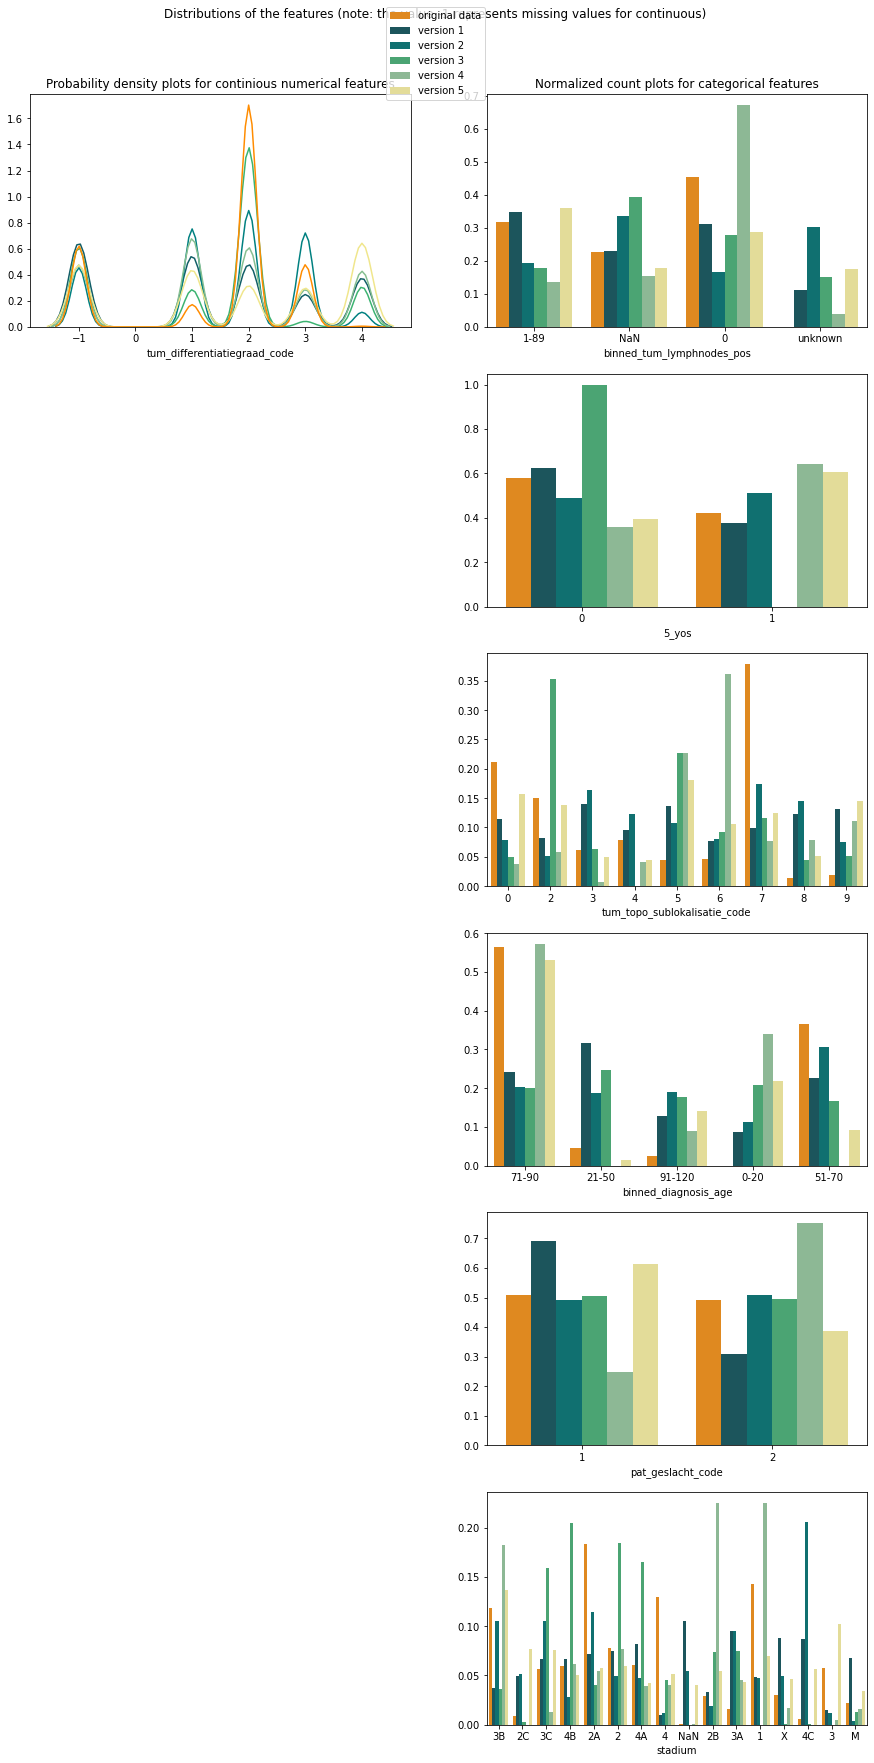

In [21]:
# Show all the five versions for pb privacy level very high
feature_distributions(df_ori, pb_privacy_levels[4], df_names=['original data', 'version 1', 'version 2', 'version 3', 'version 4', 'version 5'], cont_vars=["tum_differentiatiegraad_code"])

continuous variables are: None
other variables are: ['pat_geslacht_code', 'tum_topo_sublokalisatie_code', 'tum_differentiatiegraad_code', 'stadium', 'binned_diagnosis_age', 'binned_tum_lymphnodes_pos', '5_yos']


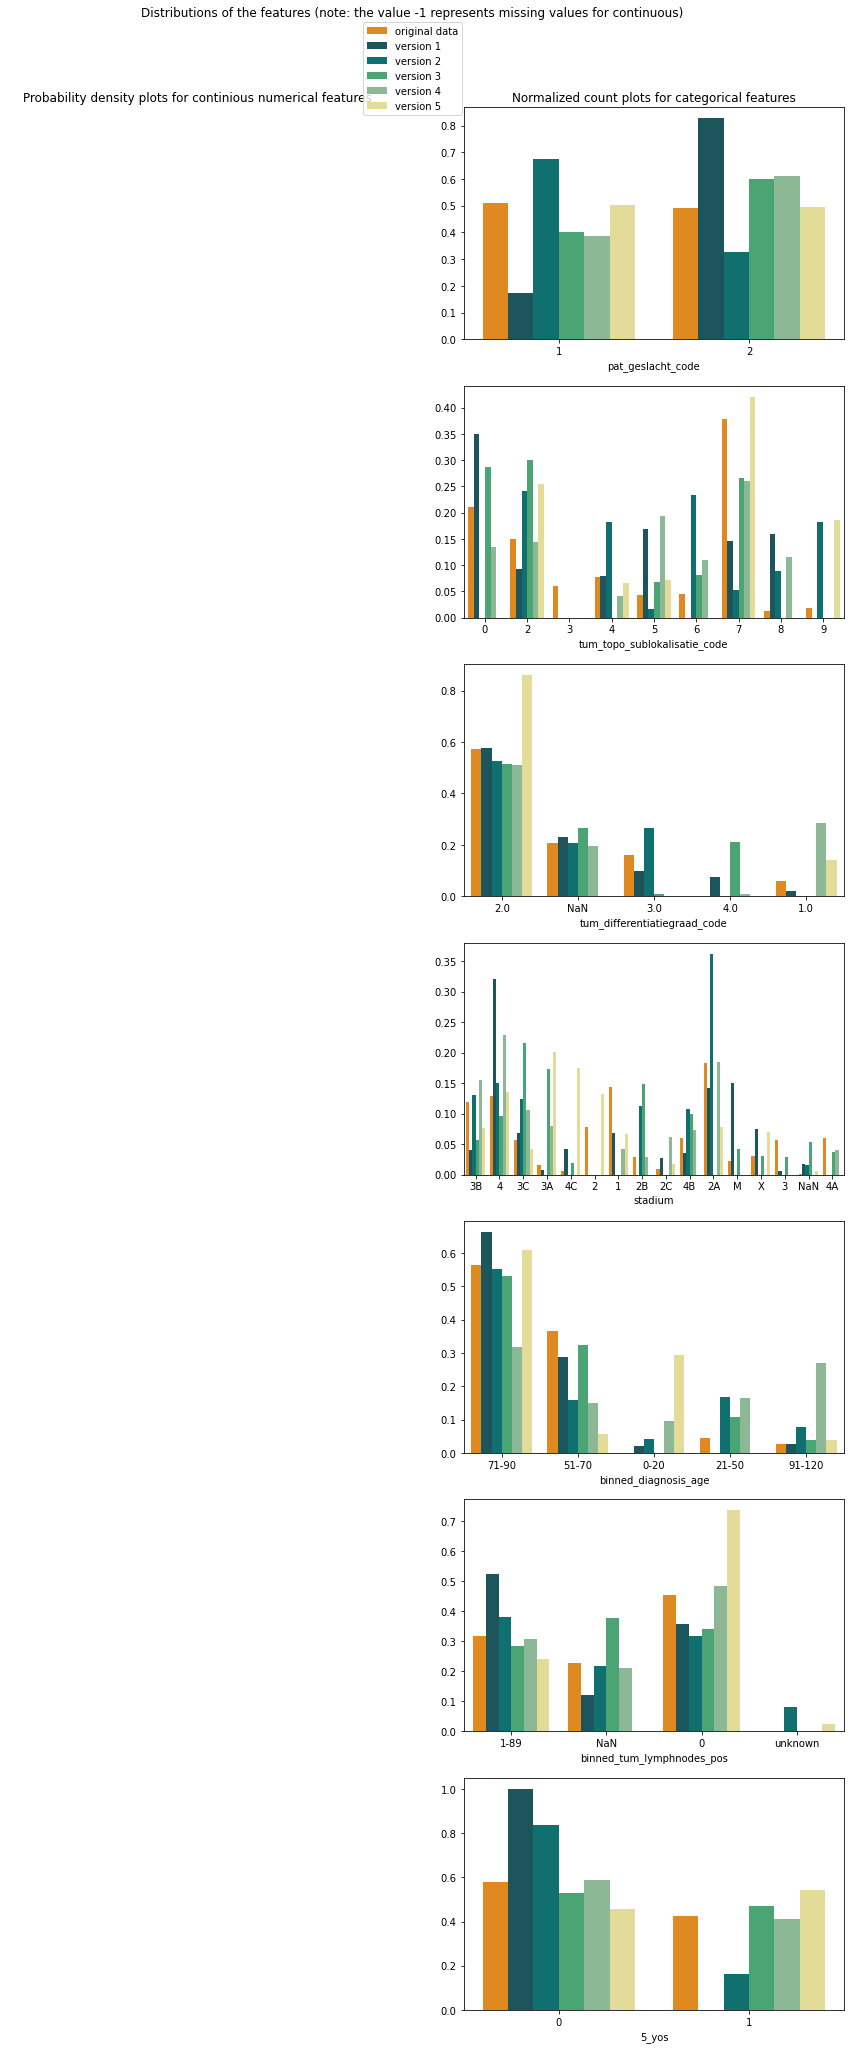

In [12]:
# Show all the five versions for ms privacy level very high e=0.001
feature_distributions(df_ori, ms_privacy_levels[4], df_names=['original data', 'version 1', 'version 2', 'version 3', 'version 4', 'version 5'])#, cont_vars=["tum_differentiatiegraad_code", 'pat_geslacht_code', '5_yos', 'tum_topo_sublokalisatie_code'])

In [32]:
# Show all the privacy levels ones. For example version 1 of all privacy levels, to have them all included once.
ms_privacy_levels_version1 = []
for i in range(0,5):
    ms_privacy_levels_version1.append(ms_privacy_levels[i][0])

continuous variables are: ['tum_differentiatiegraad_code']
other variables are: ['binned_tum_lymphnodes_pos', '5_yos', 'tum_topo_sublokalisatie_code', 'binned_diagnosis_age', 'pat_geslacht_code', 'stadium']


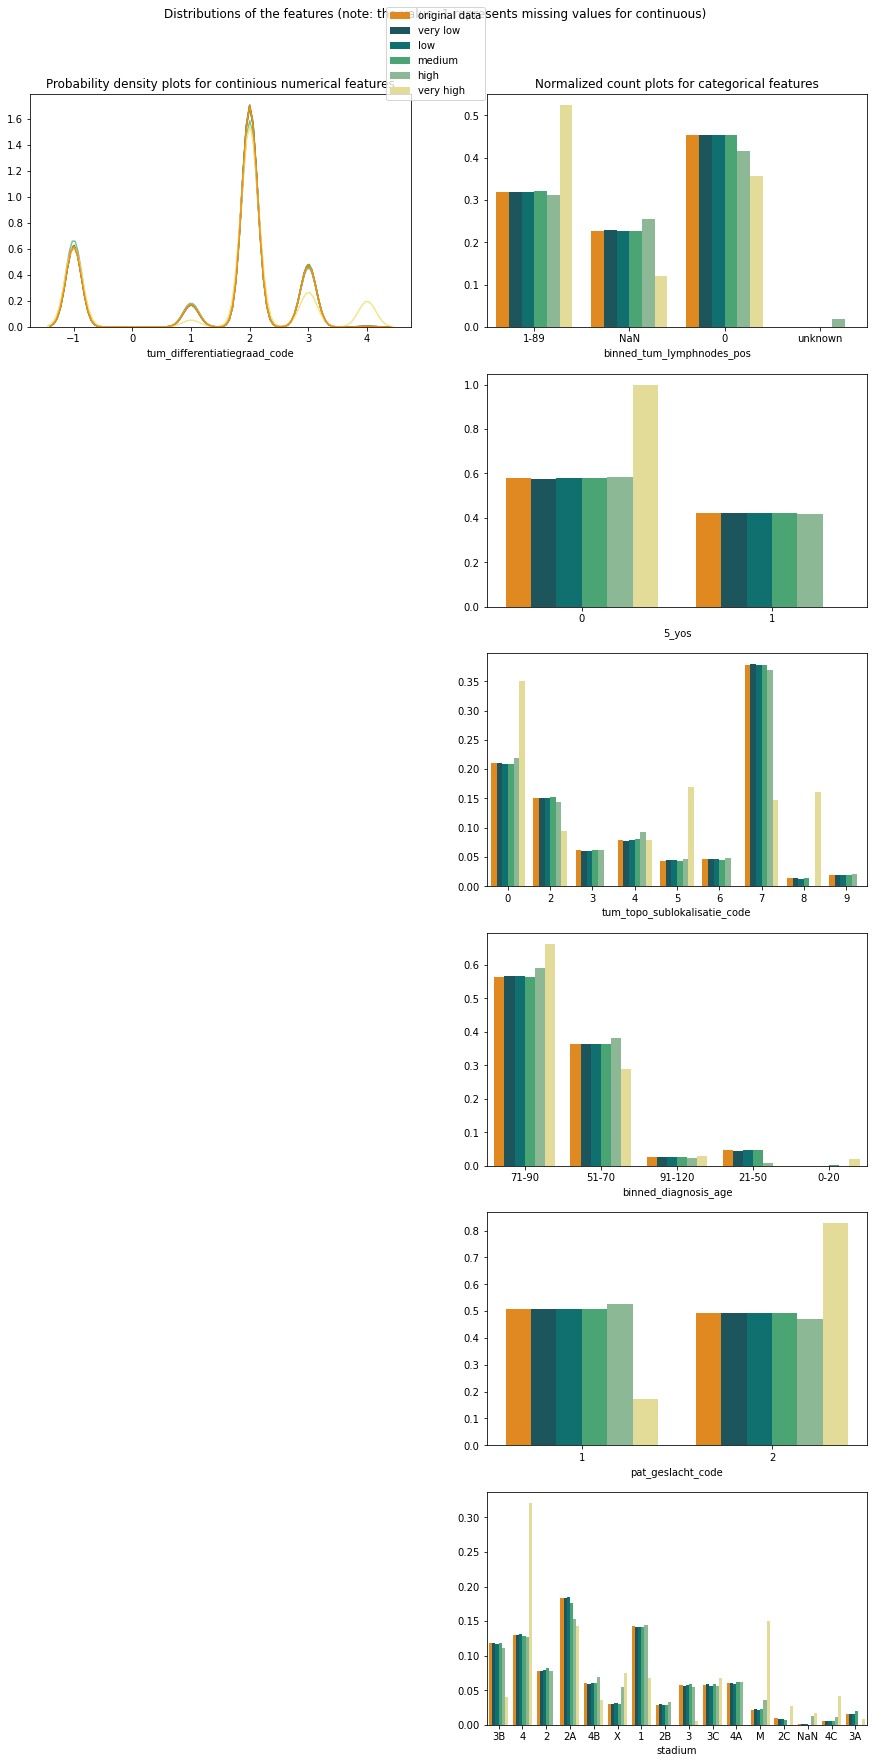

In [16]:
feature_distributions(df_ori, ms_privacy_levels_version1, df_names, cont_vars=["tum_differentiatiegraad_code"])

In [29]:
# Show all the privacy levels ones. For example version 3 of all privacy levels, to have them all included once.
pb_privacy_levels_version3 = []
for i in range(0,5):
    pb_privacy_levels_version3.append(pb_privacy_levels[i][2])

In [30]:
# To set order of x-axis for age feature

def feature_distributions2(df_ori, df_syns, df_names, cont_vars=None, colors=None):
    
    """
    Creates feature disribution plots for the features of the given dataframes.
    For continious features the plots are kernel density estimations (probability denisty estimation).
    For other features the plots are normalized probability plots.
    Enter list continious variables if they are present in the datasets.
    Names of the dataframes should be given in a list for the df_names argument with original dataframe first 
    and synthetic dataframes next in the same order as df_syns for a correct overview.
    df_syns is a list of dataframes. Can be different privacy levels or one privacy level with multiple synthetic datasets.
    Own colors can be given as an argument, but not required. Required if df_syns > 6. E.g. sns.color_palette("GnBu").
    """
    
    if cont_vars == None:
        len_cont_vars = 0
        not_cont_vars = df_ori.columns.tolist()
    else:
        len_cont_vars = len(cont_vars)
        not_cont_vars = list(set(df_ori.columns.tolist()) - set(cont_vars))
    
    print("continuous variables are:", cont_vars)
    print("other variables are:", not_cont_vars)
    
    # Create one list for all the dataframes, with original data as first dataframe
    df_ori_syns = [df_ori] + df_syns
    
    # Define colors
    if colors == None:
        colors=["darkorange", "#115e67", "teal", "mediumseagreen",  "#86bf91", "khaki", "skyblue"]

    # Create number of rows for subplots as many as numerical variables there are (or categorical, depending which one are more present)
    if len_cont_vars >= (len(df_ori_syns[-1].columns.tolist()) - len_cont_vars):
        rows = len_cont_vars
    else:
        rows = len(df_ori_syns[0].columns) - len_cont_vars

    # Create subplots grid    
    f, axes = plt.subplots(rows, 2, figsize=(15, (rows*5)))

    # Set titles for numerical and categorical features (left and right side)
    f.suptitle("Distributions of the features (note: the value -1 represents missing values for continuous)", y=0.92)
    axes[0, 0].set_title('Probability density plots for continious numerical features')
    axes[0, 1].set_title('Normalized count plots for categorical features')

    # Create probability density plots for numerical features
    a=0
    if cont_vars != None:
        for column in cont_vars:
            i=1
            for df in df_syns:
                df=df.replace(np.nan, -1) # NaN values replaced by -1 to include them in the density histogram
                ax=sns.distplot(df[column] , color=colors[i], ax=axes[a, 0], label=df_names[i], hist=False)
                ax.get_legend().set_visible(False)
                i+=1
            # Original dataset last so it is visualized on top    
            df=df_ori.replace(np.nan, -1) # NaN values replaced by -1 to include them in the density histogram
            ax=sns.distplot(df[column] , color=colors[0], ax=axes[a, 0], label=df_names[0], hist=False)
            ax.get_legend().set_visible(False)
            a+=1

    # Create probability bar plots for categorical features
    b=0
    for column in not_cont_vars:
        z=0
        df_mixed = pd.DataFrame() # Create new dataframe for one barplot for all dataframes per feature
        for df in df_ori_syns:
            df=df.replace(np.nan, 'NaN') # NaN values replaced by string to include them in the probability bar chart (density not possible for non numerical features)
            df_mixed[z]=df[column]
            z+=1
        df_mixed.columns = df_names
        df_mixed = df_mixed.stack().reset_index() # Stack such that dataframe can be used in seaborn barplot
        df_mixed.columns = ['x', 'dataset', 'y']
        order=None
        if column == 'binned_diagnosis_age':
            order = ['0-20', '21-50', '51-70', '71-90', '91-120']
        ax=sns.barplot(x='y', y='y', data=df_mixed, hue='dataset', palette=colors, order=order, ax=axes[b, 1], estimator=lambda x: len(x) / len(df), orient="v")
        ax.yaxis.label.set_visible(False)
        ax.get_legend().set_visible(False)
        ax.set_xlabel(column)
        b+=1
    
    # Add one legend for all subplots    
    handles, labels = ax.get_legend_handles_labels()
    f.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5,0.875), bbox_transform=f.transFigure)

    # Remove subplots that are not used
    for x in range(a, rows):
        axes[x,0].set_axis_off()
    for x in range(b, rows):
        axes[x,1].set_axis_off()



continuous variables are: None
other variables are: ['pat_geslacht_code', 'tum_topo_sublokalisatie_code', 'tum_differentiatiegraad_code', 'stadium', 'binned_diagnosis_age', 'binned_tum_lymphnodes_pos', '5_yos']


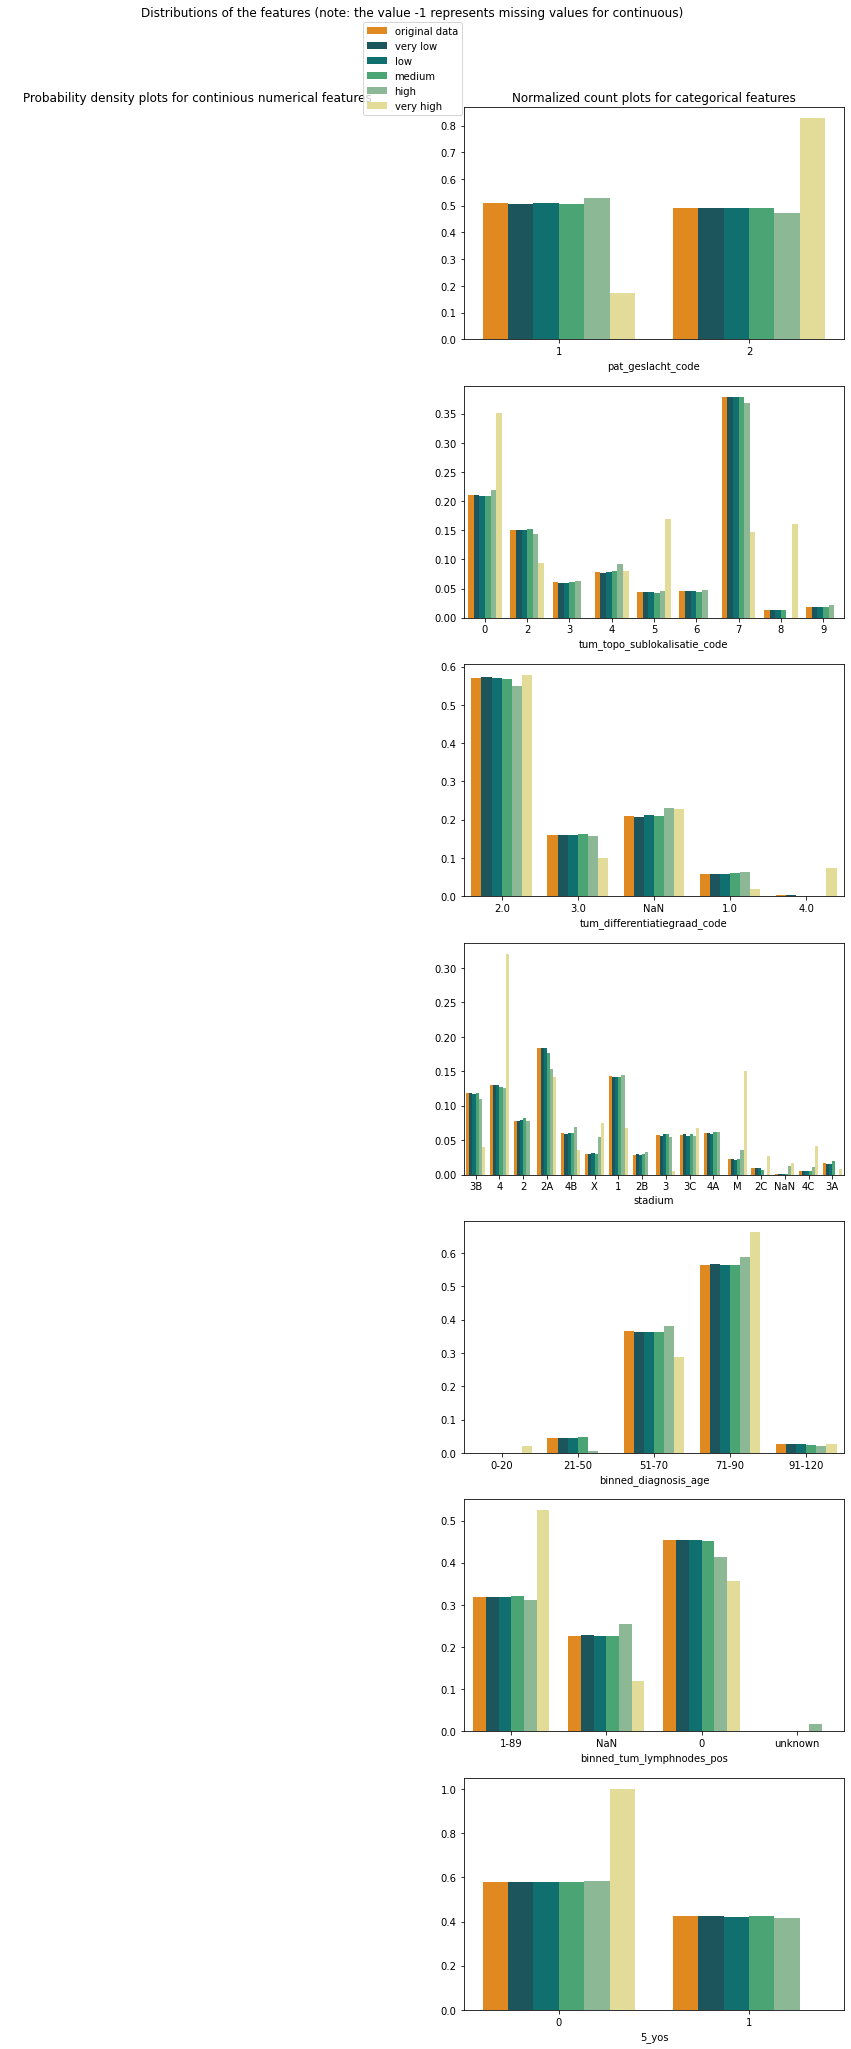

In [34]:
# With set order of x-axis for age feature
feature_distributions2(df_ori, ms_privacy_levels_version1, df_names)#, cont_vars=["tum_differentiatiegraad_code", 'pat_geslacht_code', 'tum_topo_sublokalisatie_code'])

continuous variables are: ['tum_differentiatiegraad_code']
other variables are: ['binned_tum_lymphnodes_pos', '5_yos', 'tum_topo_sublokalisatie_code', 'binned_diagnosis_age', 'pat_geslacht_code', 'stadium']


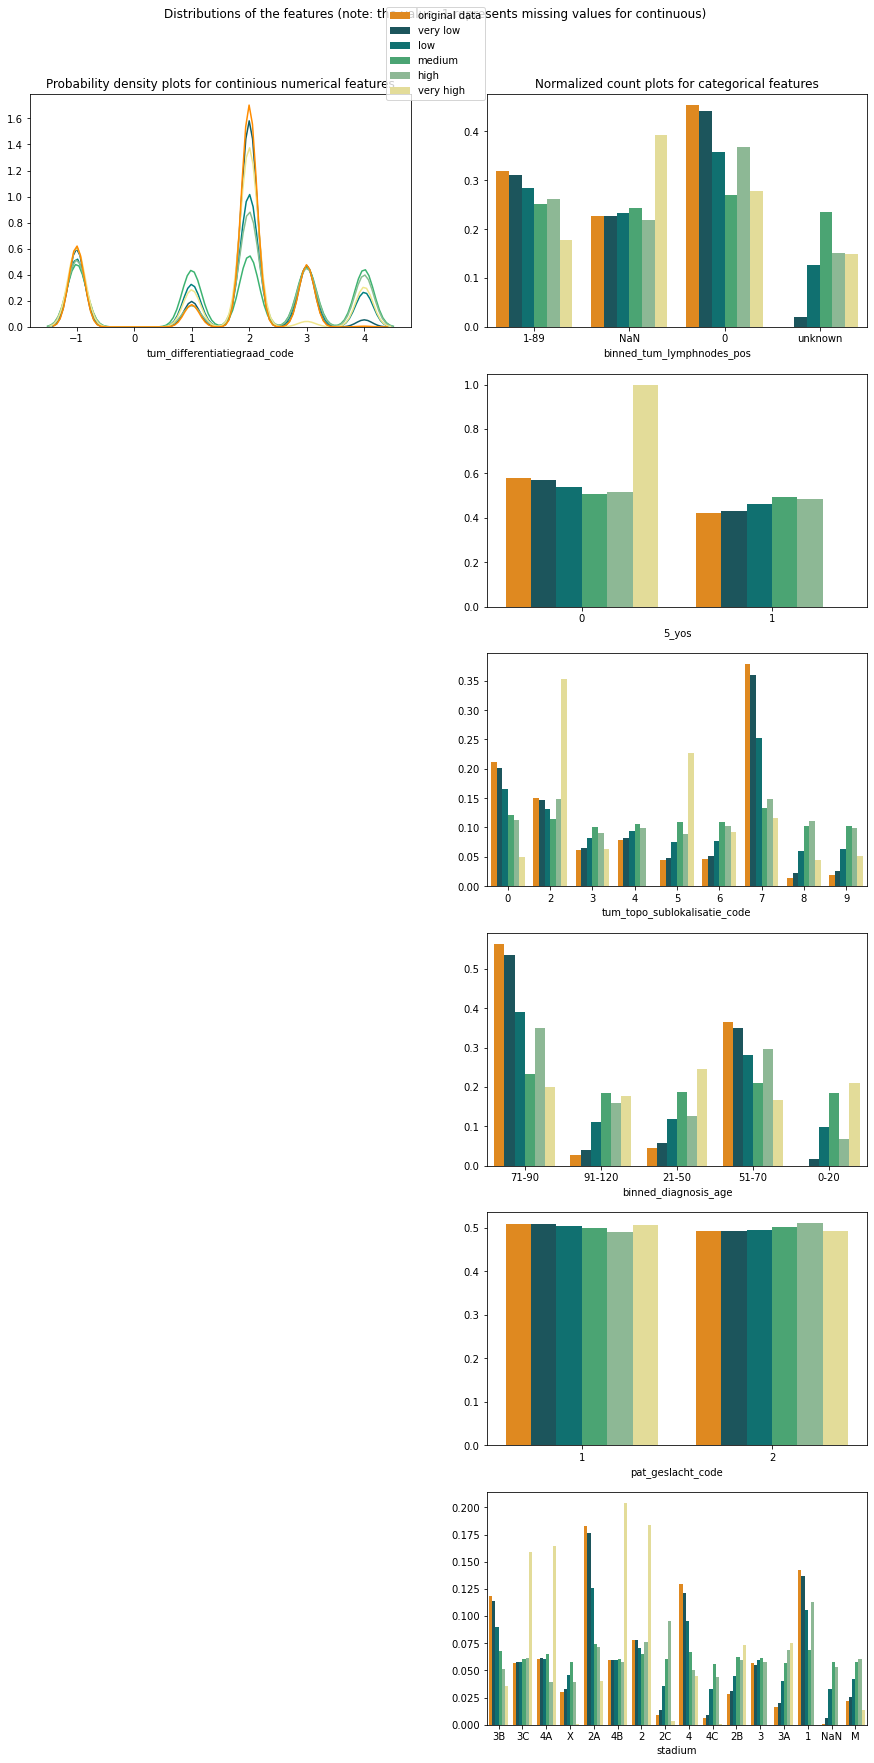

In [20]:
feature_distributions(df_ori, pb_privacy_levels_version3, df_names, cont_vars=["tum_differentiatiegraad_code"])

## Correlation matrices per dataset and overall distance with original data

In [14]:
# Due to dicretizing more nominal cols
nominal_cols = ['tum_topo_sublokalisatie_code', 'tum_differentiatiegraad_code', 'stadium', 'binned_tum_lymphnodes_pos', "binned_diagnosis_age"]

new algorithm
privacy level: very low
original data


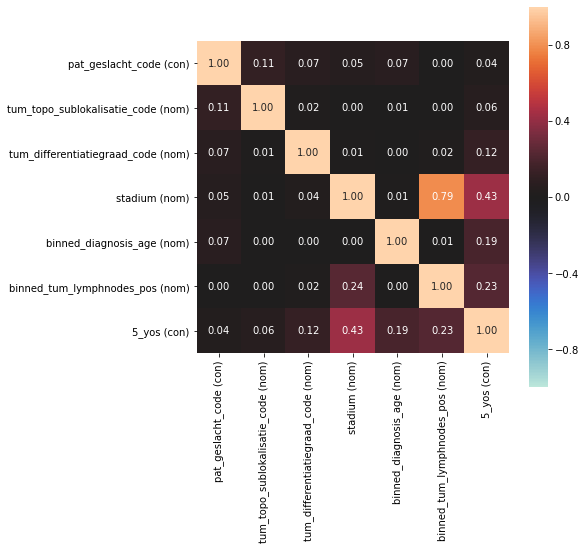

version 1


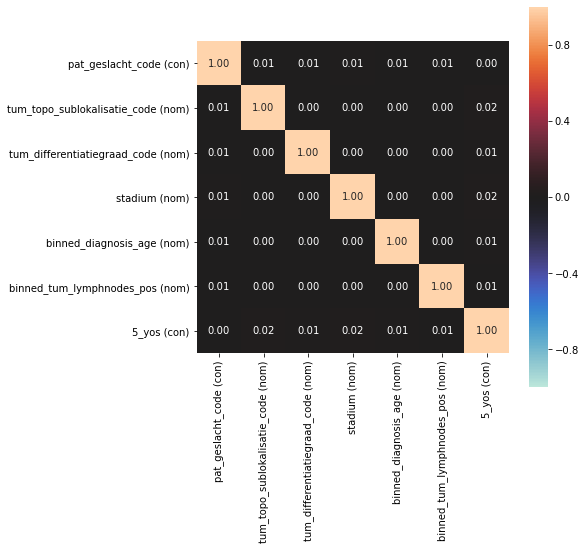

version 2


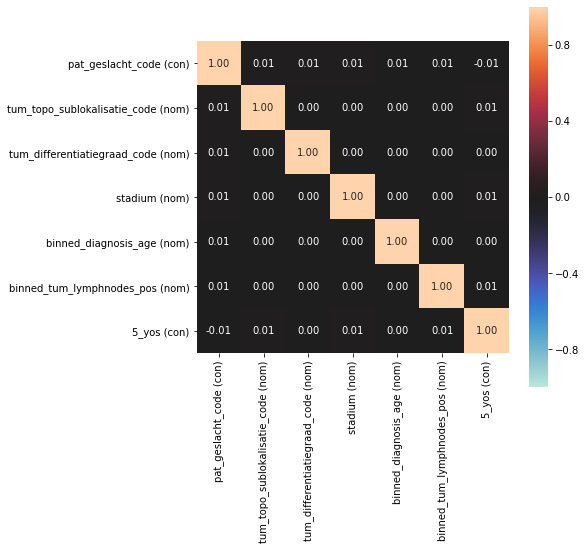

version 3


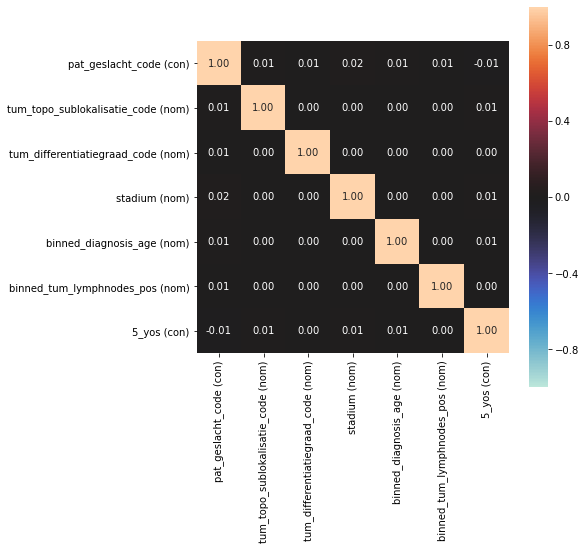

version 4


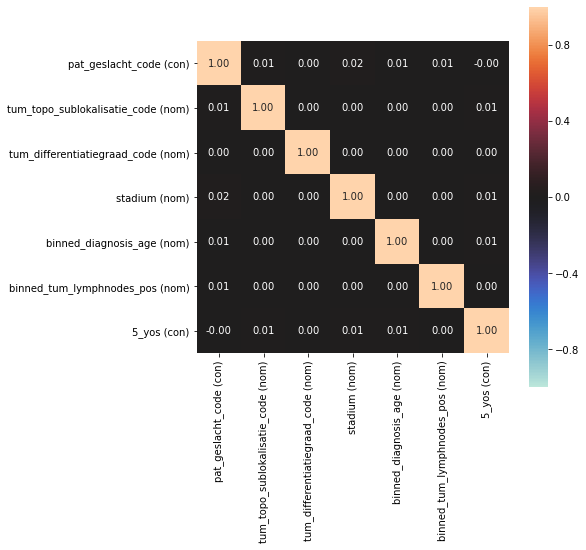

version 5


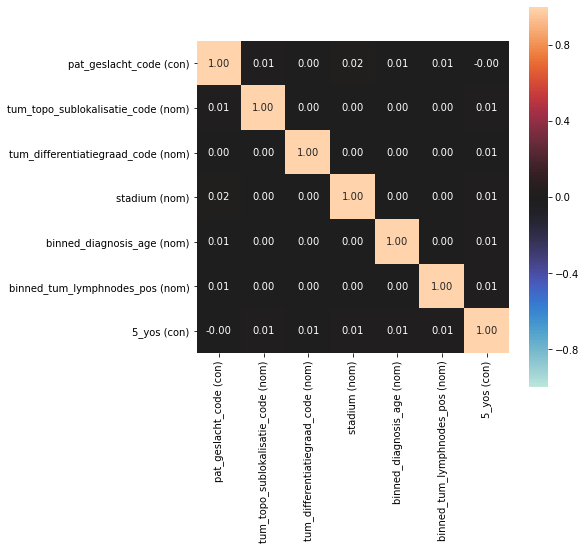

privacy level: low
original data


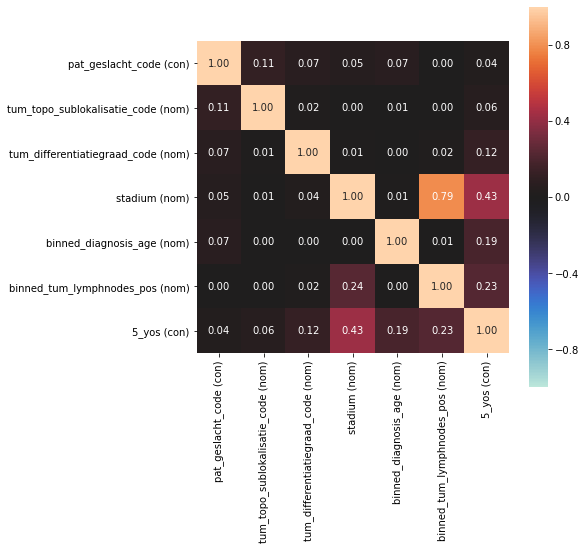

version 1


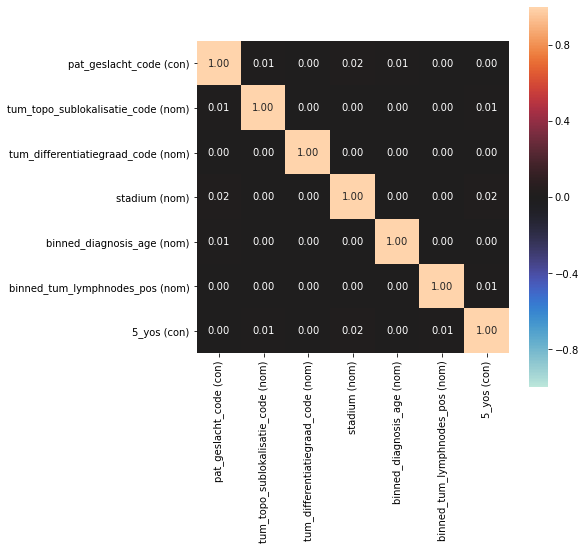

version 2


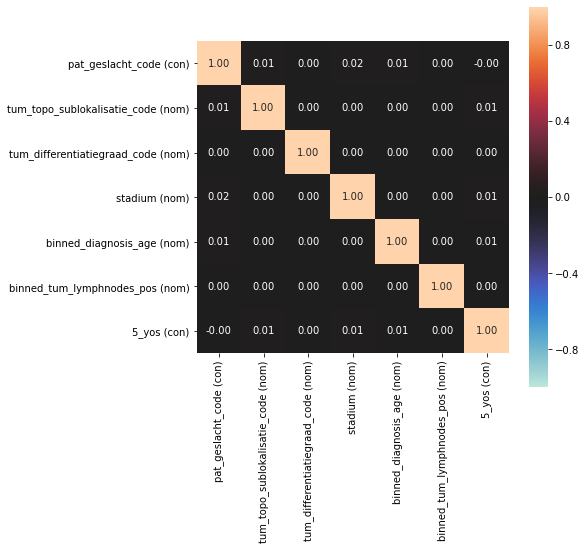

version 3


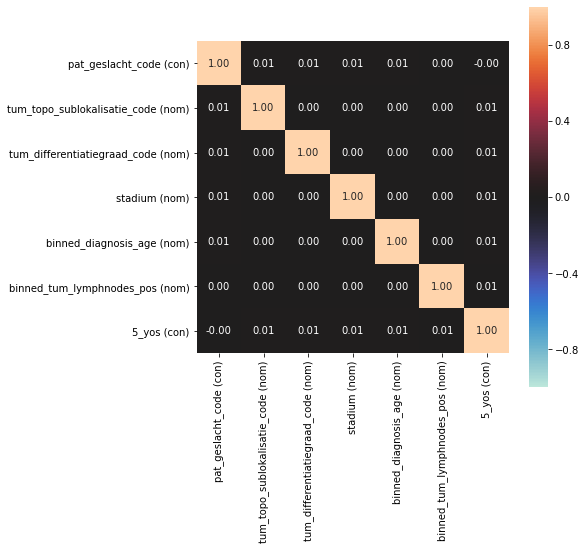

version 4


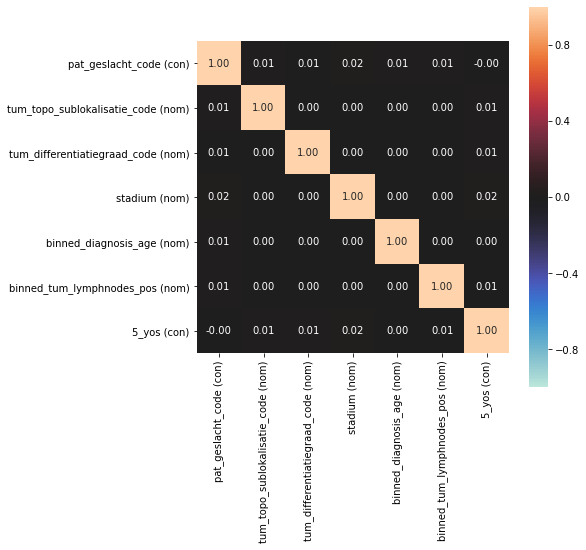

version 5


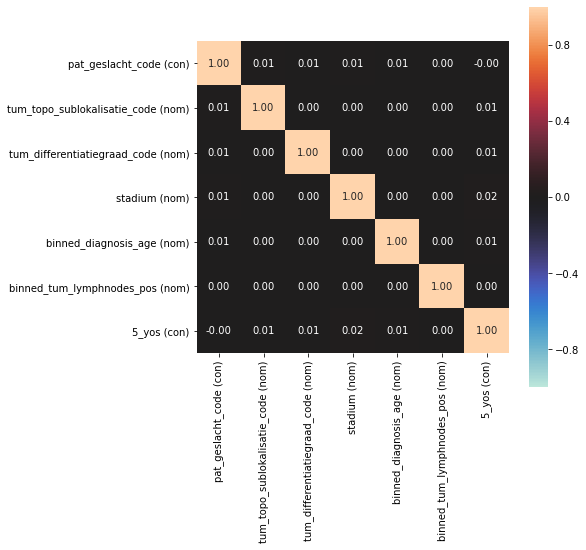

privacy level: medium
original data


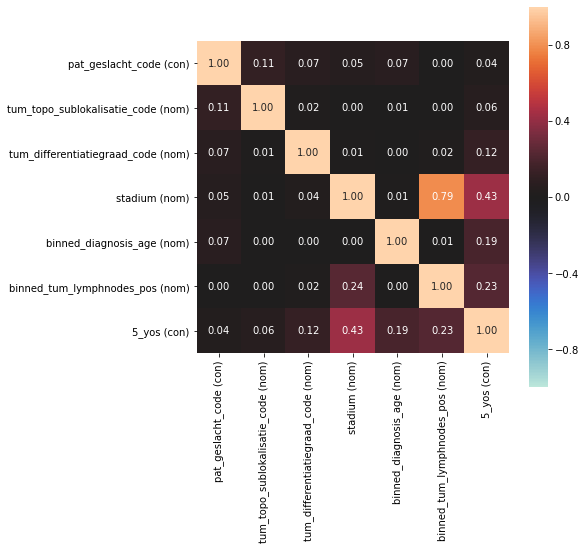

version 1


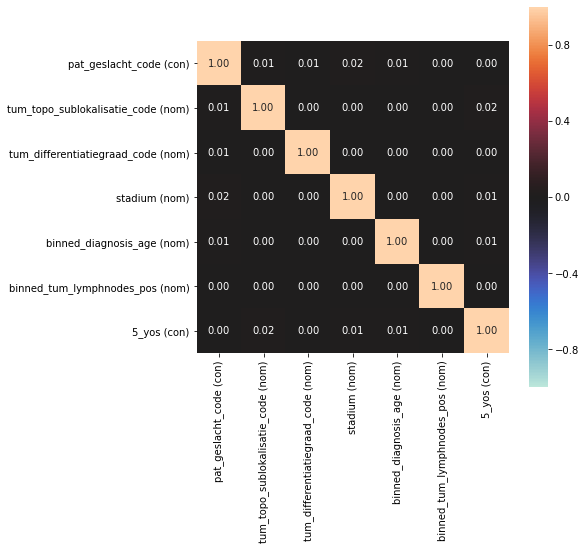

version 2


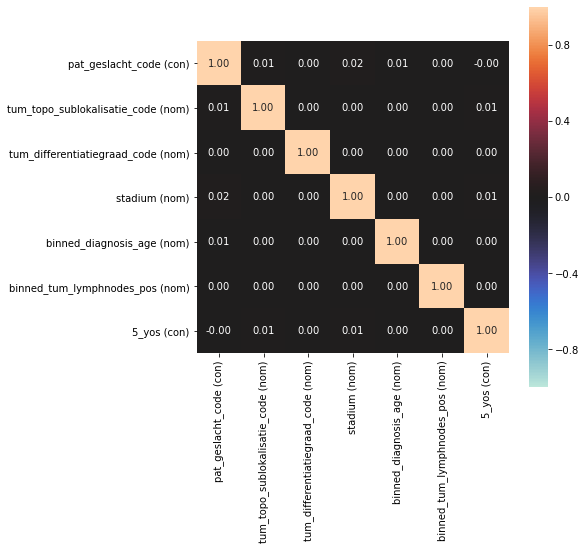

version 3


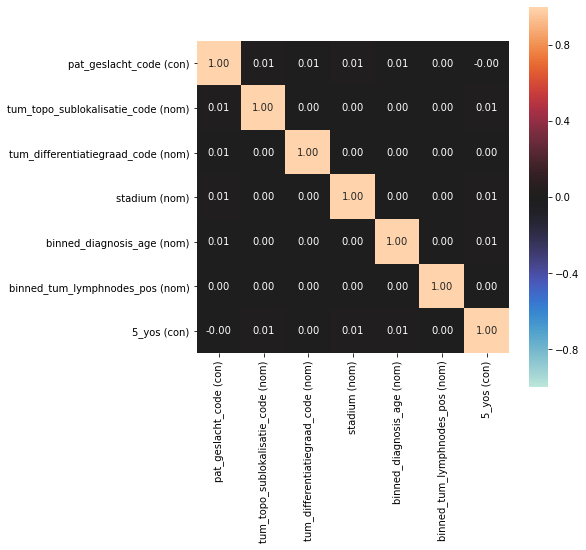

version 4


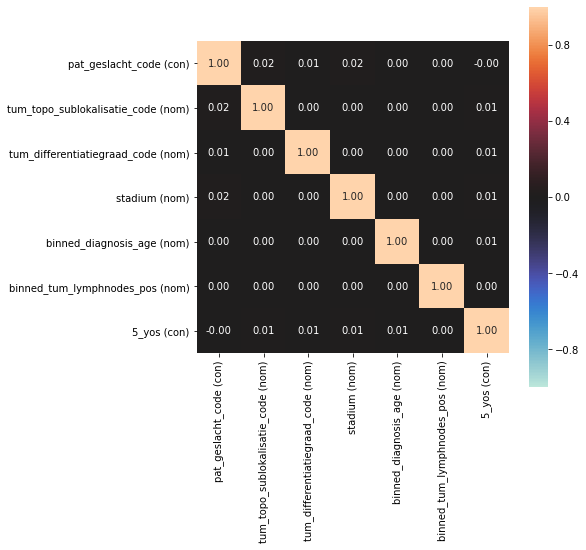

version 5


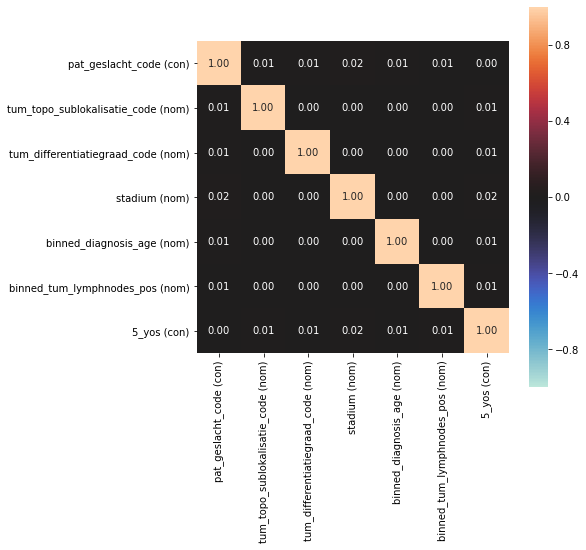

privacy level: high
original data


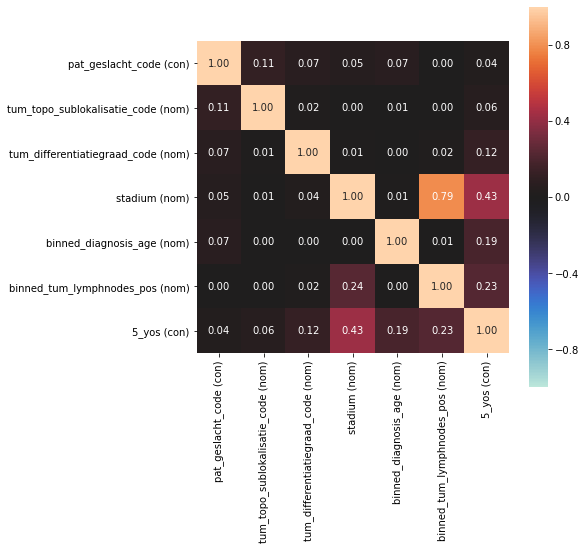

version 1


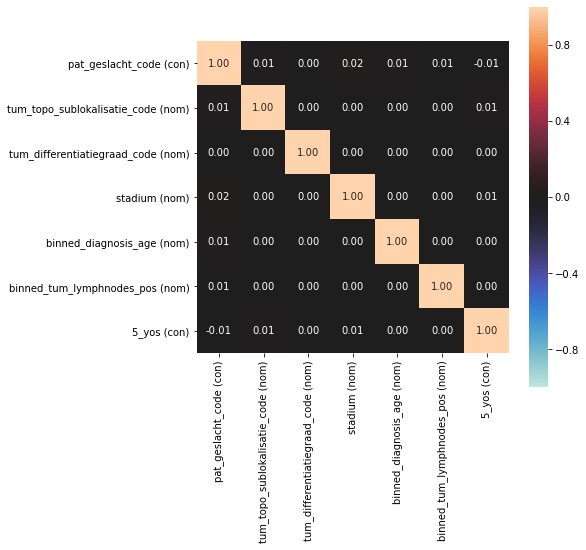

version 2


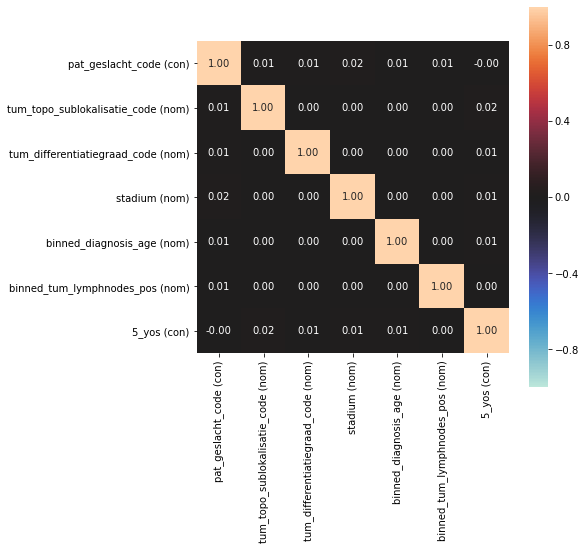

version 3


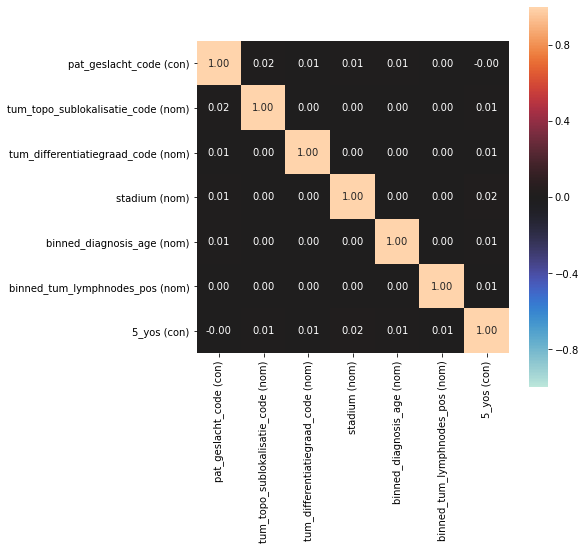

version 4


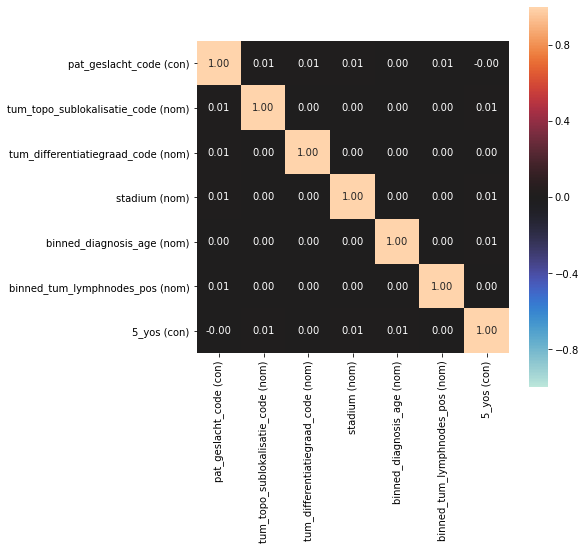

version 5


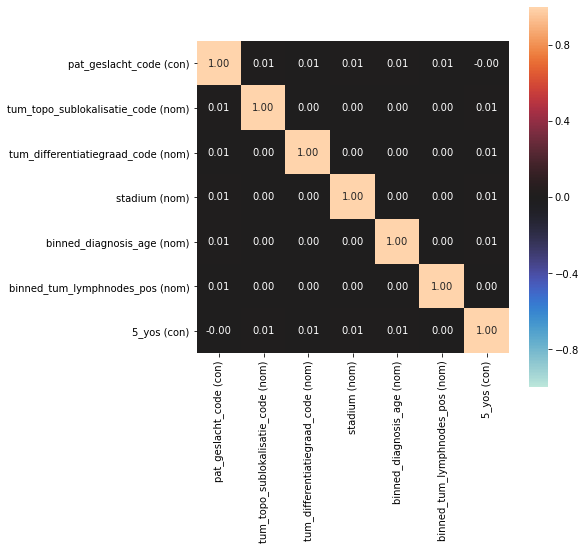

privacy level: very high
original data


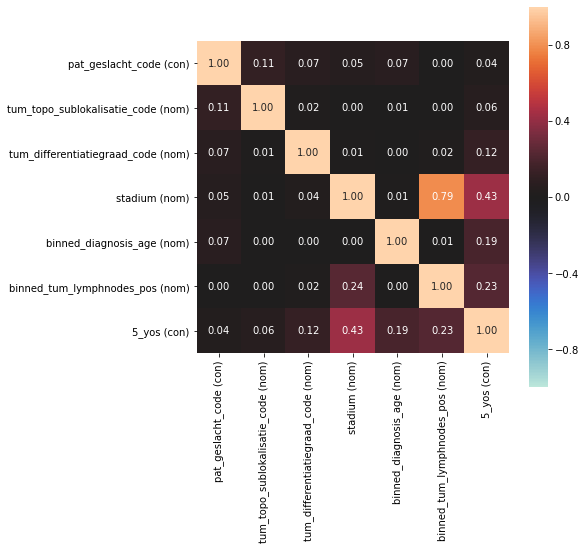

version 1


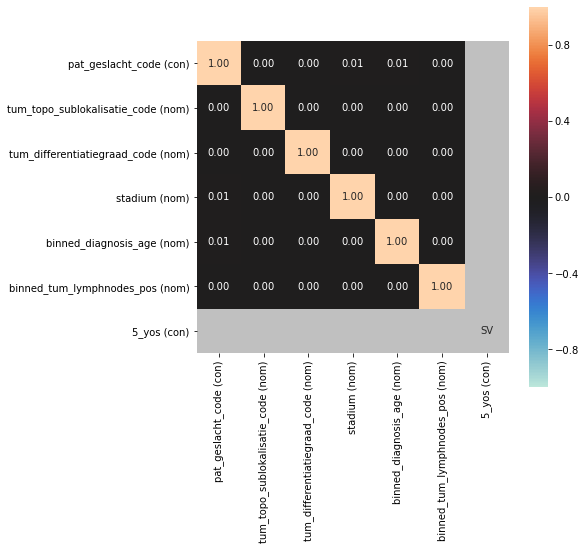

version 2


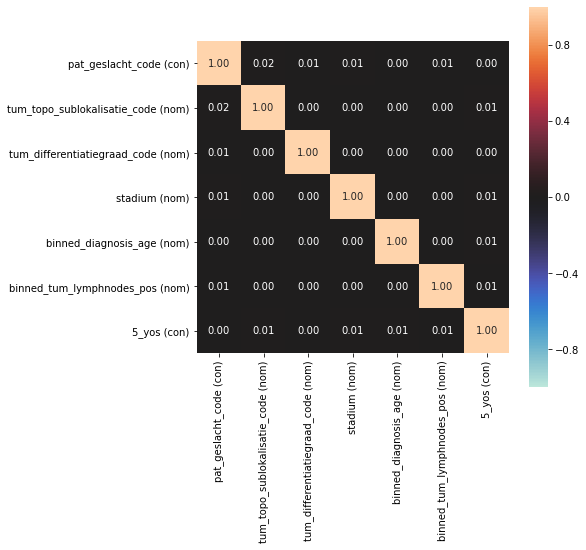

version 3


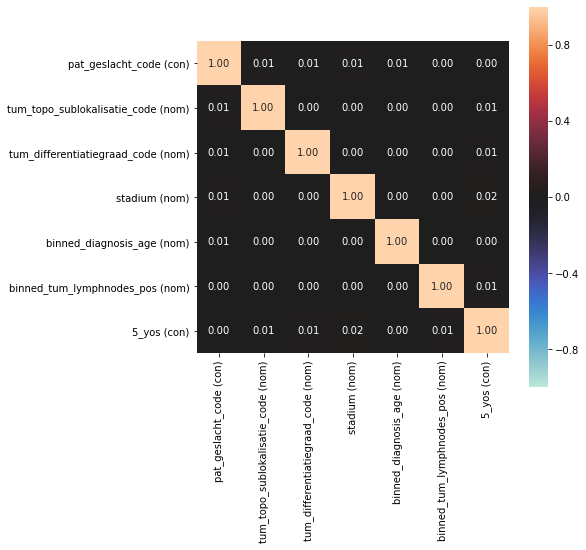

version 4


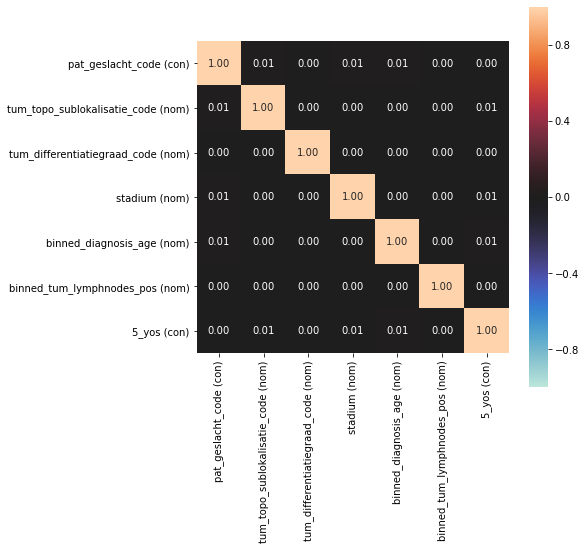

version 5


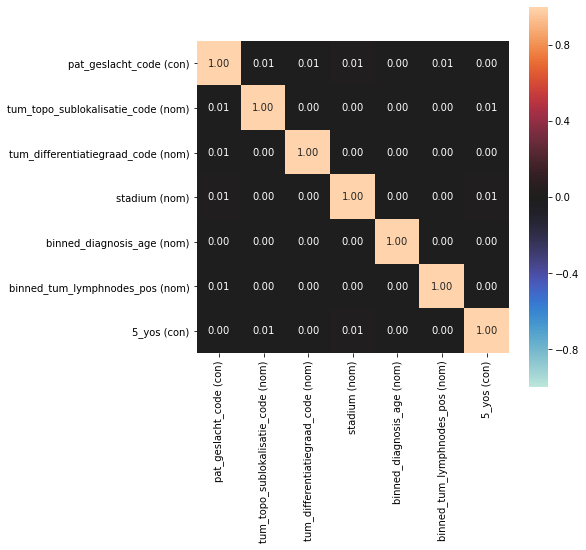

new algorithm
privacy level: very low
original data


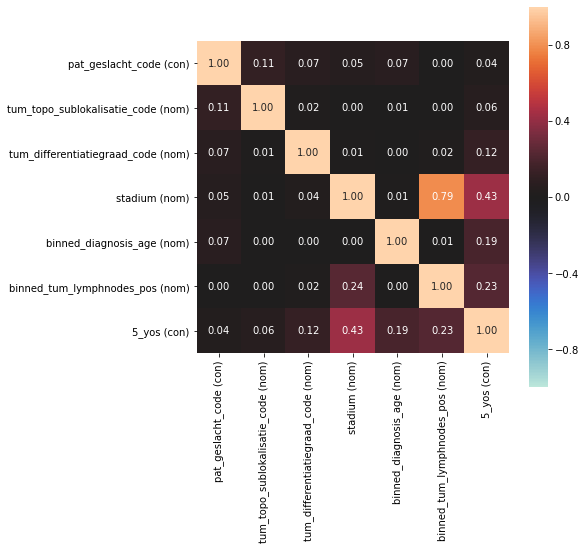

version 1


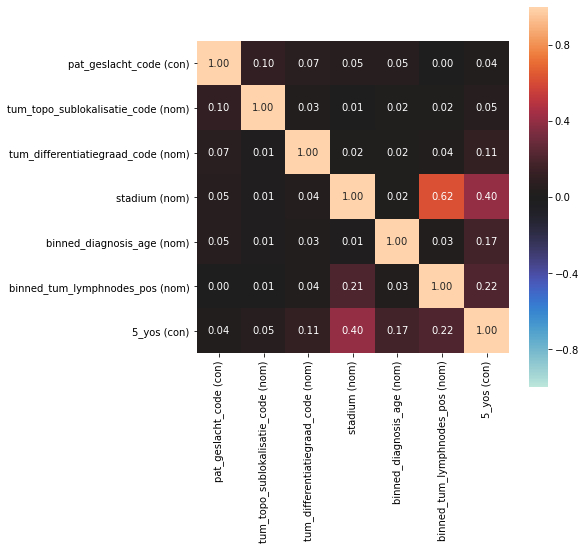

version 2


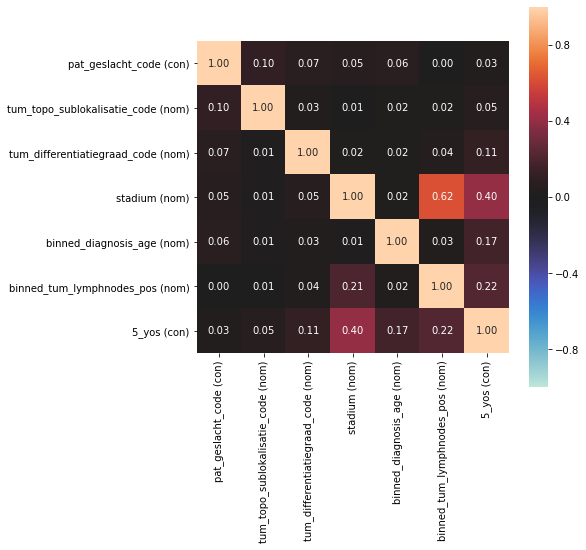

version 3


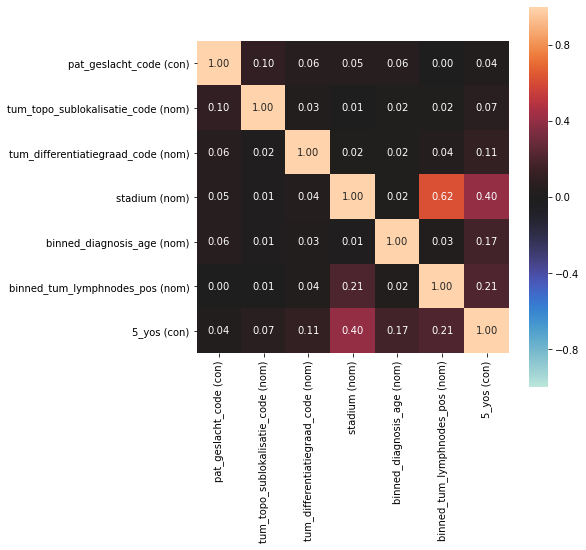

version 4


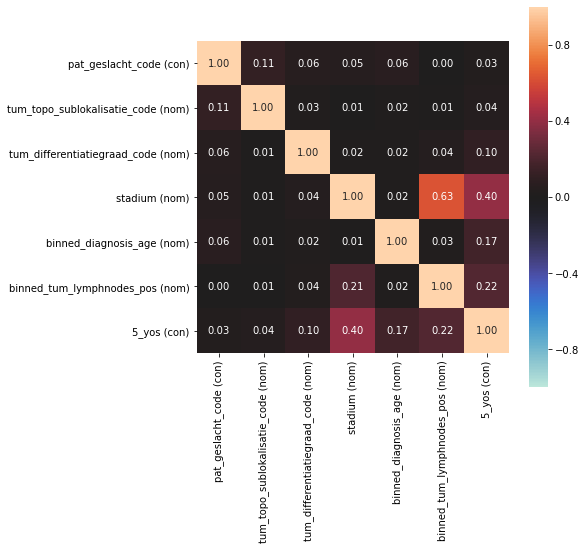

version 5


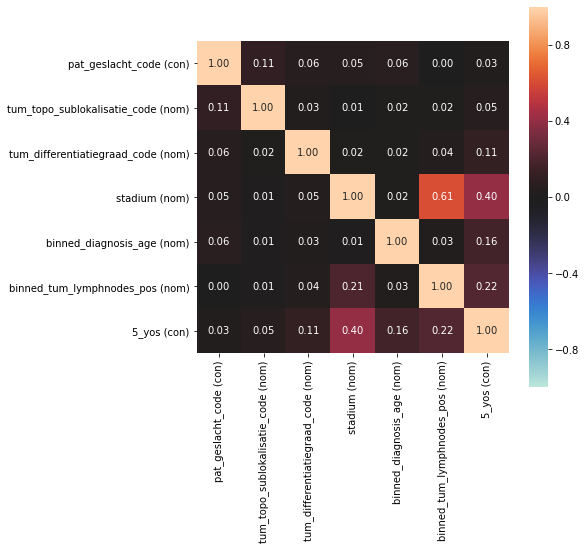

privacy level: low
original data


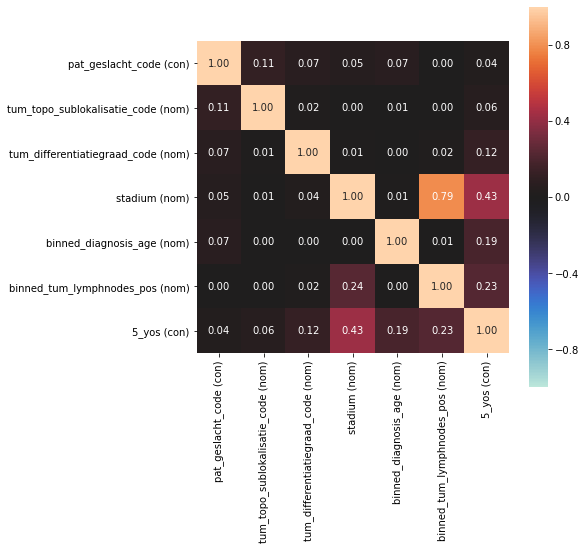

version 1


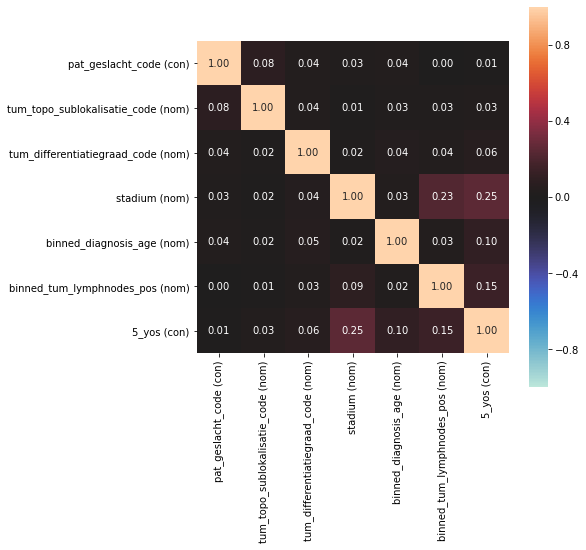

version 2


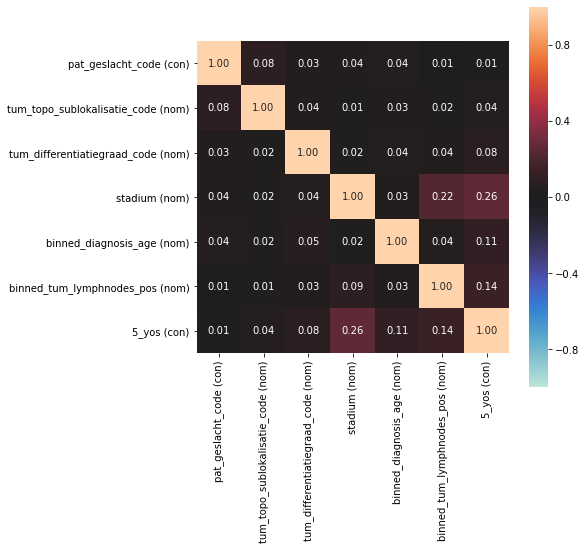

version 3


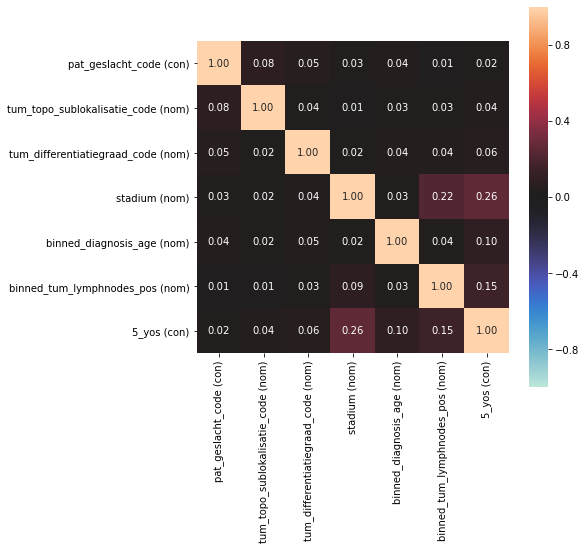

version 4


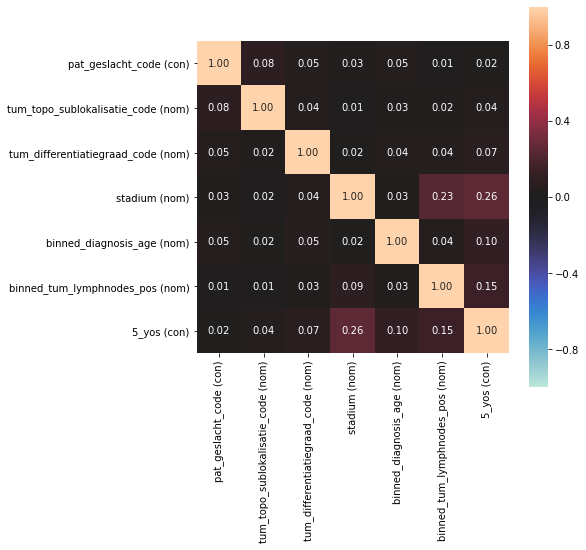

version 5


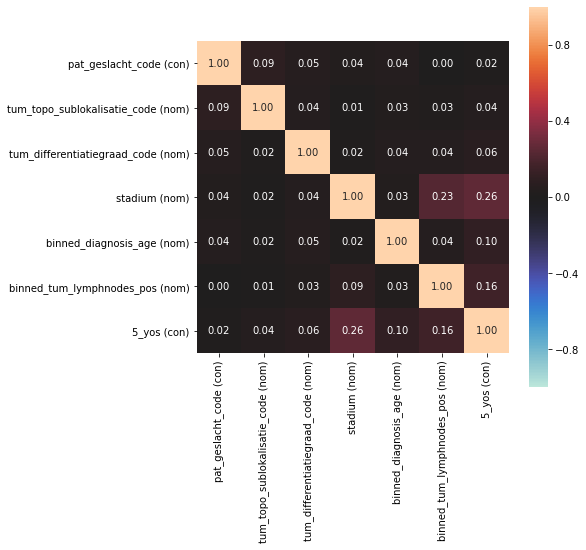

privacy level: medium
original data


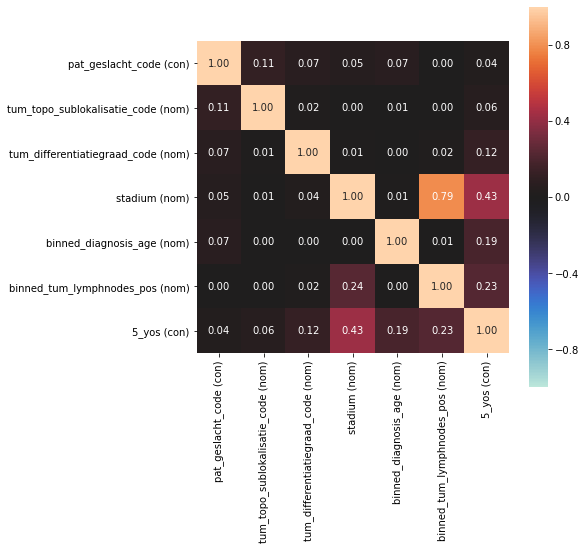

version 1


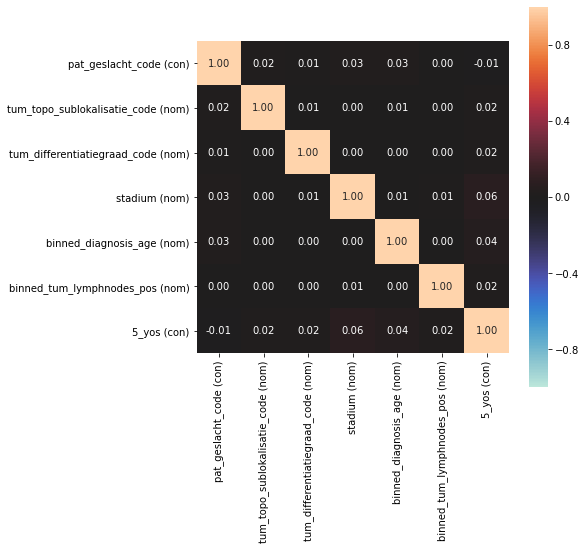

version 2


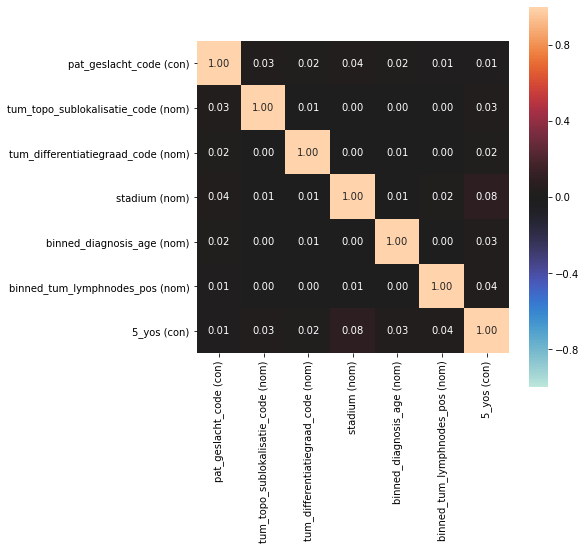

version 3


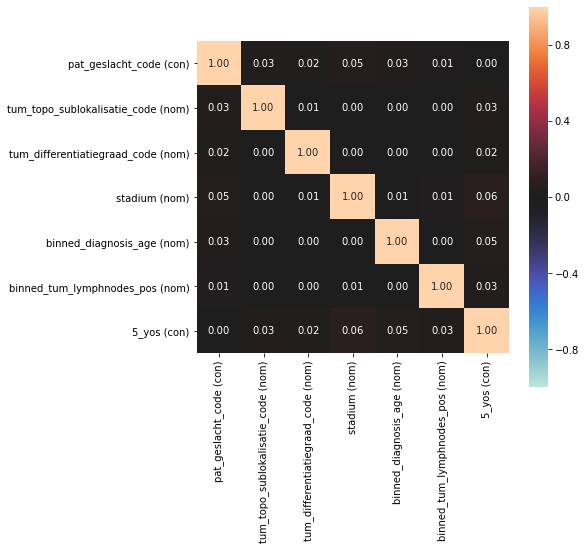

version 4


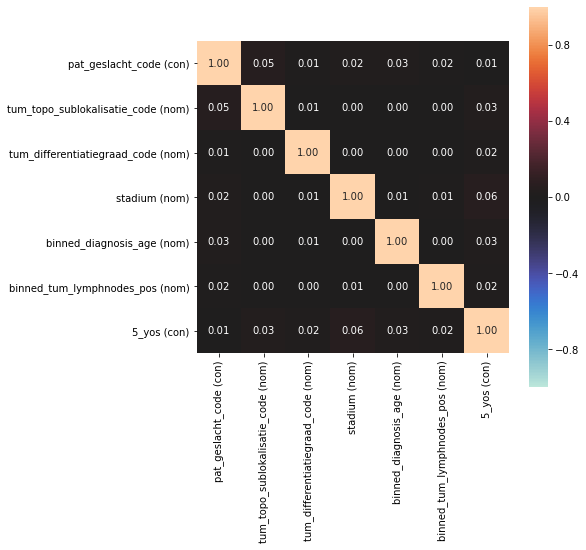

version 5


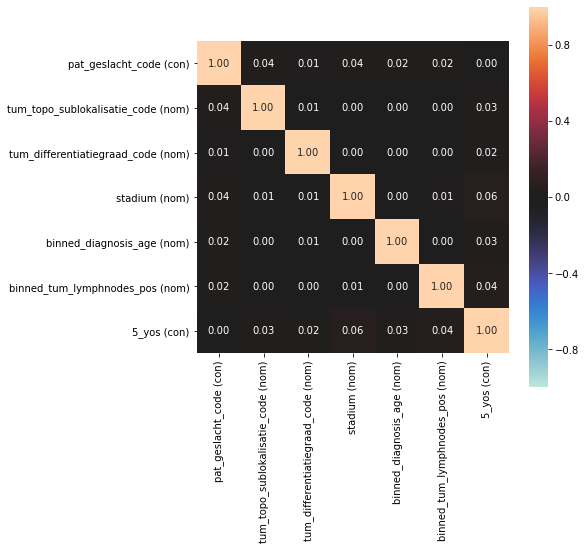

privacy level: high
original data


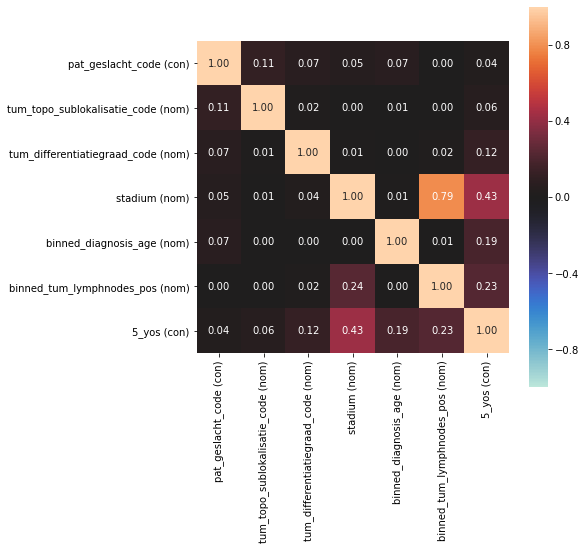

version 1


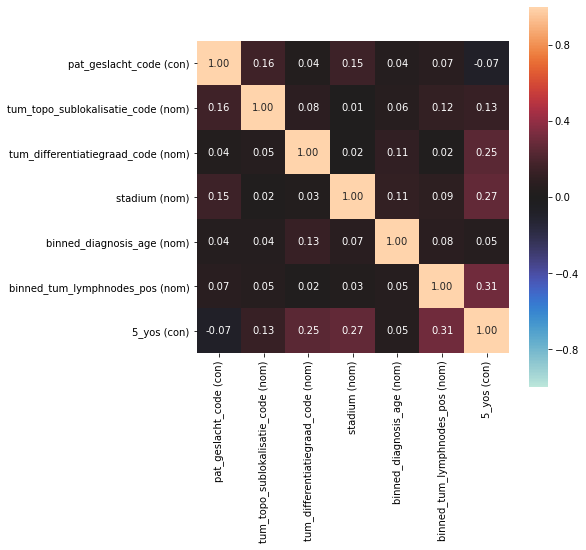

version 2


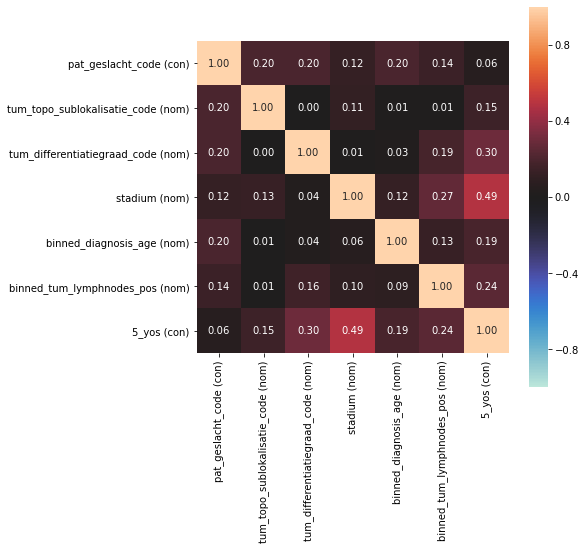

version 3


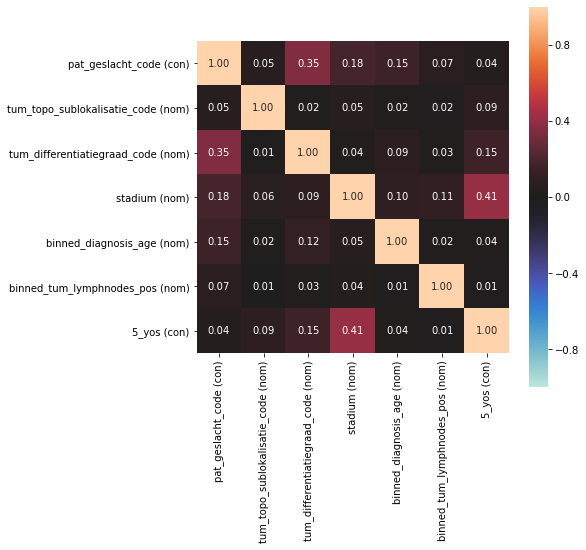

version 4


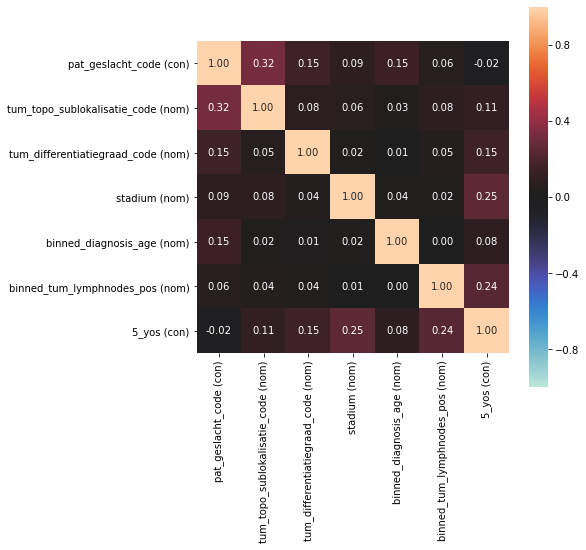

version 5


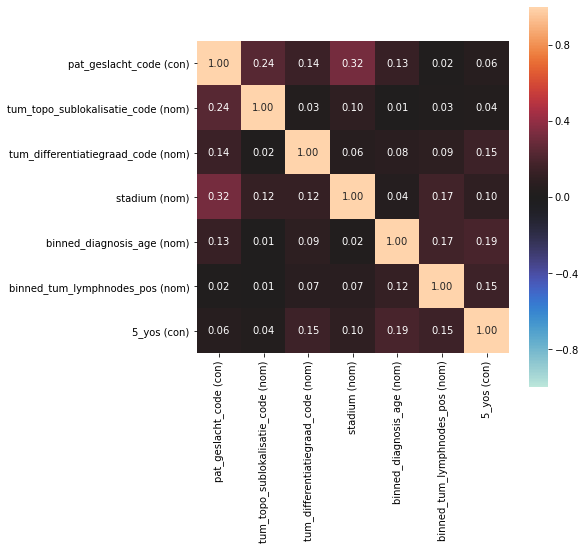

privacy level: very high
original data


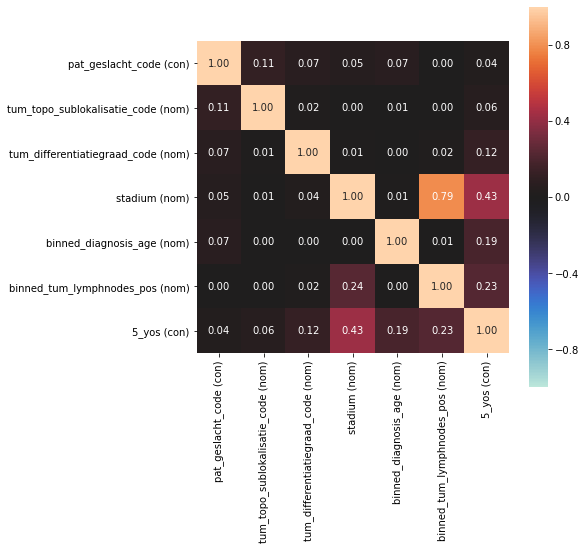

version 1


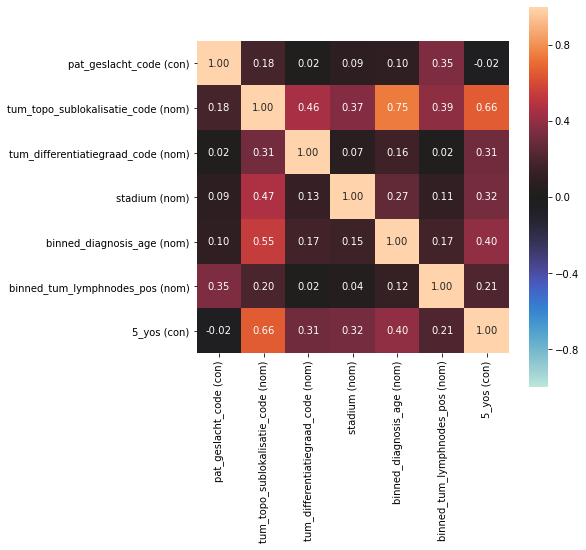

version 2


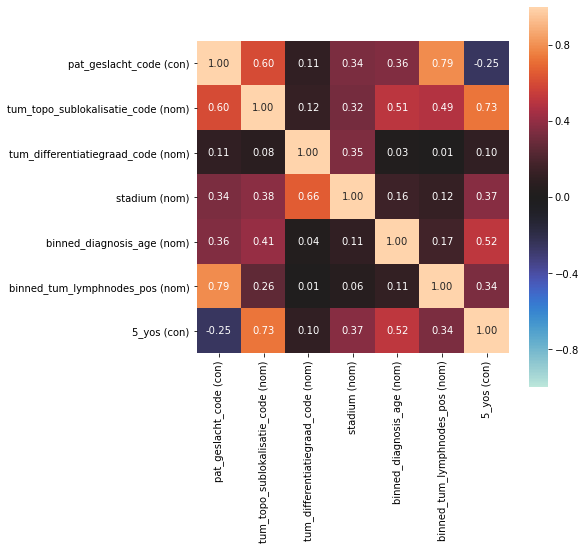

version 3


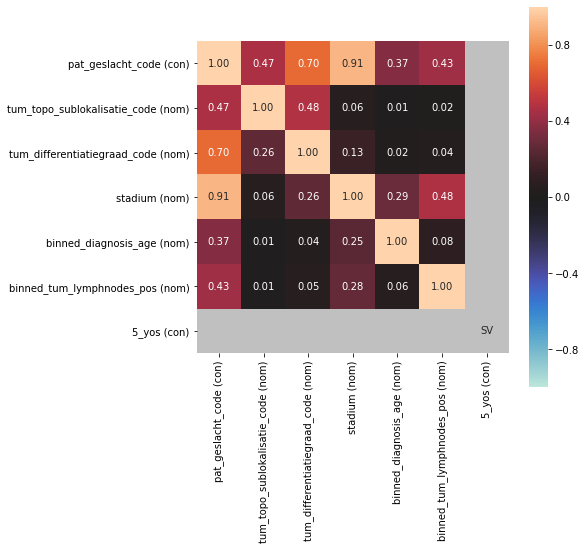

version 4


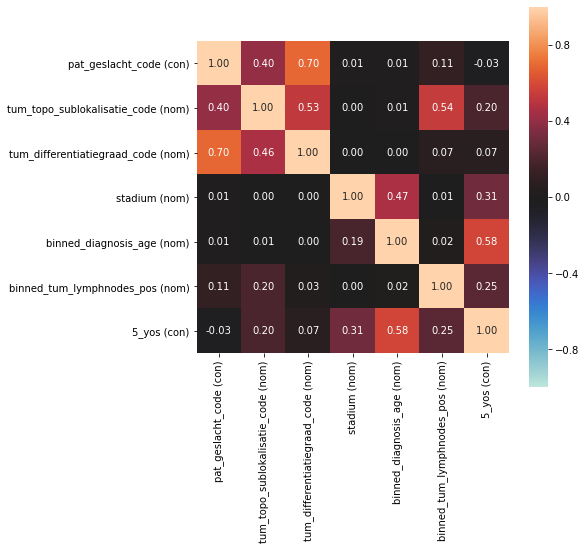

version 5


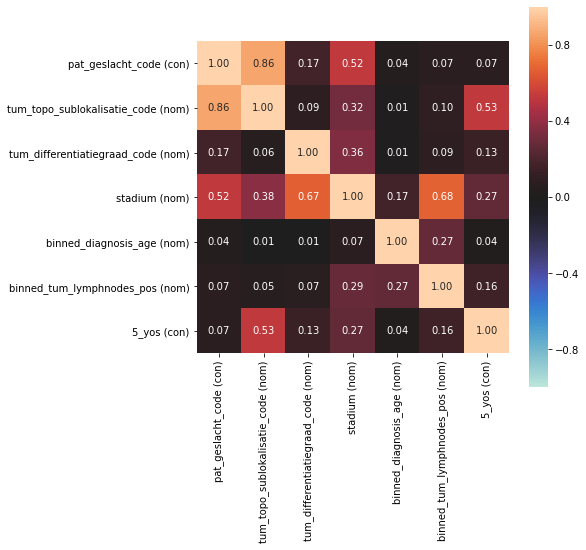

In [18]:
# Show all correlation matrices
for privacy_levels in [ms_privacy_levels, pb_privacy_levels]:
    j=1
    print("new algorithm")
    for df_syns in privacy_levels:
        print("privacy level:", df_names[j])
        correlation_matrices(df_ori=df_ori, df_syns=df_syns, df_names=["original data", "version 1", "version 2", "version 3", "version 4", "version 5"], nominal_cols=nominal_cols)
        j+=1

In [19]:
# Calculate the pair-wise euclidean distance (frobenius norm) for all versions of one privacy level
ms_veryhigh_fro_norm = corr_fro_norm(df_ori, ms_privacy_levels[4], nominal_cols)

In [20]:
# Calculate the pair-wise euclidean distance (frobenius norm) for one version of all privacy levels
ms_privacy_levels_version3 = []
for i in range(0,5):
    ms_privacy_levels_version3.append(ms_privacy_levels[i][2])
    
ms_version3_fro_norm = corr_fro_norm(df_ori, ms_privacy_levels_version3, nominal_cols)

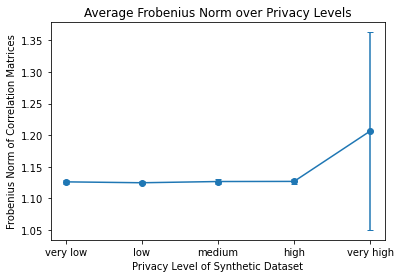

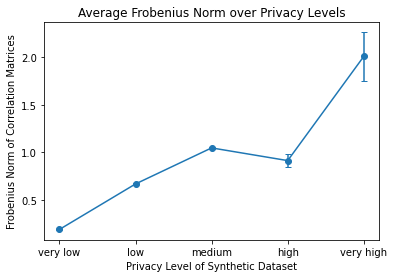

In [21]:
# Plot the correlation distance for both algorithms with multiple versions per privacy level
plotCorrdistance(df_ori, ms_privacy_levels, labels, nominal_cols)
plotCorrdistance(df_ori, pb_privacy_levels, labels, nominal_cols)

In [15]:
# Store for combined results at end
ms_avg_corr, ms_std_corr = avg_corr_fro_norm(df_ori, ms_privacy_levels, nominal_cols)
pb_avg_corr, pb_std_corr = avg_corr_fro_norm(df_ori, pb_privacy_levels, nominal_cols)

In [16]:
np.save('ms_avg_corr2.npy', ms_avg_corr)
np.save('ms_std_corr2.npy', ms_std_corr)

np.save('pb_avg_corr2.npy', pb_avg_corr)
np.save('pb_std_corr2.npy', pb_std_corr)

# Visualize combined results for feature and correlation distances

In [23]:
labels = ['very low', 'low', 'medium', 'high', 'very high']

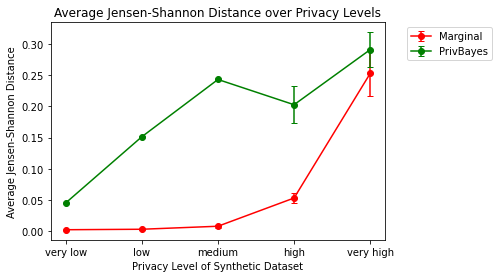

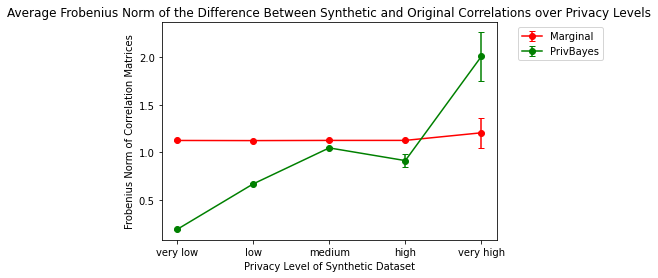

In [24]:
figJS = plotJSdistances_two_algs(ms_avgJSdistances, ms_stdJSdistances, pb_avgJSdistances, pb_stdJSdistances, labels)
figCorr = plotCorrdistances_two_algs(ms_avg_corr, ms_std_corr, pb_avg_corr, pb_std_corr, labels)

figJS.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Result_JS_distance-subset_2.png', bbox_inches='tight', dpi=200)
figCorr.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Result_correlation_distance-subset_2.png', bbox_inches='tight', dpi=200)